# Importing the neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.cluster import Birch
from sklearn.cluster import KMeans, BisectingKMeans
from statistics import mode, mean, median
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score, GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting
from sklearn.metrics import accuracy_score,explained_variance_score, mean_absolute_percentage_error, f1_score, plot_confusion_matrix, r2_score, mean_absolute_error,mean_squared_error, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from pandas_profiling import ProfileReport
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool 
from xgboost import XGBClassifier, XGBRegressor, DMatrix
from sklearn.metrics import log_loss
from mlxtend.frequent_patterns import apriori, association_rules
from pivottablejs import pivot_ui
import warnings
from sklearn.feature_selection import chi2
warnings.filterwarnings("ignore")


In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.2.


# Importing Dataset

In [3]:
df = pd.read_csv('Census.csv')
df.head()

Person ID     Region Residence Type  Family Composition  Population Base  \
0    7394816  E12000001              H                   2                1   
1    7394832  E12000001              H                   3                1   
2    7394719  E12000001              H                   2                1   
3    7394840  E12000001              H                   1                1   
4    7394711  E12000001              H                   2                1   

   Sex  Age  Marital Status  Student  Country of Birth  Health  Ethnic Group  \
0    2    6               2        2                 1       2             1   
1    2    1               1        2                 1       2             1   
2    1    7               2        2                 1       1             1   
3    2    6               4        2                 1       3             1   
4    1    1               1        1                 1       1             1   

   Religion  Economic Activity  Occupation  Industry  Hours worked per week  \
0         2                  5           8         2                     -9   
1         1                 -9          -9        -9                     -9   
2         2                  5           8         2                     -9   
3         2                  5           9         5                     -9   
4         1                 -9          -9        -9                     -9   

   No of hours  Approximated Social Grade  
0          NaN                          4  
1          NaN                         -9  
2          NaN                          2  
3          NaN                          4  
4          NaN                         -9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569740 entries, 0 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  569740 non-null  int64  
 1   Region                     569740 non-null  object 
 2   Residence Type             569740 non-null  object 
 3   Family Composition         569740 non-null  int64  
 4   Population Base            569740 non-null  int64  
 5   Sex                        569740 non-null  int64  
 6   Age                        569740 non-null  int64  
 7   Marital Status             569740 non-null  int64  
 8   Student                    569740 non-null  int64  
 9   Country of Birth           569740 non-null  int64  
 10  Health                     569740 non-null  int64  
 11  Ethnic Group               569740 non-null  int64  
 12  Religion                   569740 non-null  int64  
 13  Economic Activity          56

In [5]:
df.describe()

Person ID  Family Composition  Population Base            Sex  \
count  5.697400e+05        569740.00000    569740.000000  569740.000000   
mean   7.679353e+06             2.01187         1.018731       1.507551   
std    1.644699e+05             2.35879         0.159058       0.499943   
min    7.394483e+06            -9.00000         1.000000       1.000000   
25%    7.536918e+06             2.00000         1.000000       1.000000   
50%    7.679352e+06             2.00000         1.000000       2.000000   
75%    7.821787e+06             3.00000         1.000000       2.000000   
max    7.964223e+06             6.00000         3.000000       2.000000   

                 Age  Marital Status        Student  Country of Birth  \
count  569740.000000   569740.000000  569740.000000     569740.000000   
mean        3.978676        1.856201       1.777904          1.016237   
std         2.219494        1.125021       0.415656          1.153095   
min         1.000000        1.000000       1.000000         -9.000000   
25%         2.000000        1.000000       2.000000          1.000000   
50%         4.000000        2.000000       2.000000          1.000000   
75%         6.000000        2.000000       2.000000          1.000000   
max         8.000000        5.000000       2.000000          2.000000   

              Health   Ethnic Group       Religion  Economic Activity  \
count  569740.000000  569740.000000  569740.000000      569740.000000   
mean        1.658323       1.191247       2.419384           0.685597   
std         1.486599       1.391857       2.493065           5.265470   
min        -9.000000      -9.000000      -9.000000          -9.000000   
25%         1.000000       1.000000       1.000000           1.000000   
50%         2.000000       1.000000       2.000000           1.000000   
75%         2.000000       1.000000       2.000000           5.000000   
max         5.000000       5.000000       9.000000           9.000000   

          Occupation       Industry  Hours worked per week    No of hours  \
count  569740.000000  569740.000000          569740.000000  267419.000000   
mean        1.240982       2.459843              -3.487106      35.234789   
std         6.521825       7.398951               5.887538      13.520881   
min        -9.000000      -9.000000              -9.000000       1.000000   
25%        -9.000000      -9.000000              -9.000000      27.000000   
50%         3.000000       4.000000              -9.000000      37.000000   
75%         6.000000       8.000000               3.000000      45.000000   
max         9.000000      12.000000               4.000000      60.000000   

       Approximated Social Grade  
count              569740.000000  
mean                    0.034123  
std                     4.862673  
min                    -9.000000  
25%                     1.000000  
50%                     2.000000  
75%                     3.000000  
max                     4.000000

In [6]:
df.median()

Person ID                    7679352.5
Family Composition                 2.0
Population Base                    1.0
Sex                                2.0
Age                                4.0
Marital Status                     2.0
Student                            2.0
Country of Birth                   1.0
Health                             2.0
Ethnic Group                       1.0
Religion                           2.0
Economic Activity                  1.0
Occupation                         3.0
Industry                           4.0
Hours worked per week             -9.0
No of hours                       37.0
Approximated Social Grade          2.0
dtype: float64

In [7]:
df.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [8]:
df.nunique()

Person ID                    569740
Region                           10
Residence Type                    2
Family Composition                7
Population Base                   3
Sex                               2
Age                               8
Marital Status                    5
Student                           2
Country of Birth                  3
Health                            6
Ethnic Group                      6
Religion                         10
Economic Activity                10
Occupation                       10
Industry                         13
Hours worked per week             5
No of hours                      60
Approximated Social Grade         5
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr=df_corr.loc[(df_corr['level_0']=='No of hours') & (df_corr['level_0']!=df_corr['level_1'])]
df_corr.columns = ['Target Feature', 'Input Features', 'Correlation Value']
df_corr.reset_index(inplace=True)
df_corr.drop('index', axis=1)

Target Feature             Input Features  Correlation Value
0     No of hours             Marital Status           0.003460
1     No of hours            Population Base           0.004243
2     No of hours                        Age           0.008495
3     No of hours           Country of Birth           0.009205
4     No of hours                  Person ID           0.016197
5     No of hours                   Religion           0.019640
6     No of hours               Ethnic Group           0.028001
7     No of hours         Family Composition           0.030135
8     No of hours                     Health           0.042805
9     No of hours                   Industry           0.107437
10    No of hours  Approximated Social Grade           0.110856
11    No of hours          Economic Activity           0.216365
12    No of hours                 Occupation           0.221490
13    No of hours                    Student           0.269756
14    No of hours                        Sex           0.286324
15    No of hours      Hours worked per week           0.936231

In [11]:
df.columns

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [12]:
df1 = df.copy()
df1['Region']= df1['Region'].replace("E12000001","North East").replace("E12000002","North West").replace("E12000003","Yorkshire and the Humber").replace("E12000004","East Midlands").replace("E12000005","West Midlands").replace("E12000006","East of England").replace("E12000007","London").replace("E12000008","South East").replace("E12000009","South West").replace("W92000004","Wales")
df1['Residence Type']= df1['Residence Type'].replace("C","Resident in a communal establishment").replace("H" , "Not resident in a communal establishment")
df1['Family Composition']= df1['Family Composition'].replace(1,"Not in a family").replace(2,"Married/same-sex civil partnership couple family").replace(3,"Cohabiting couple family").replace(4,"Lone parent family (male head)").replace(5,"Lone parent family (female head)").replace(6,"Other related family").replace(-9,"No code required (Resident of a communal establishment, students or schoolchildren living away during term-time, or a short-term resident)")
df1['Population Base']= df1['Population Base'].replace(1,"Usual resident").replace(2,"Student living away from home during term-time").replace(3,"Short-term resident")
df1['Sex']= df1['Sex'].replace(1,"Male").replace(2,"Female")
df1['Age']= df1['Age'].replace(1,"0 to 15").replace(2,"16 to 24").replace(3,"25 to 34").replace(4,"35 to 44").replace(5,"45 to 54").replace(6,"55 to 64").replace(7,"65 to 74").replace(8,"75 and over")
df1['Marital Status']= df1['Marital Status'].replace(1,"Single (never married or never registered a same-sex civil partnership)").replace(2,"Married or in a registered same-sex civil partnership").replace(3,"Separated but still legally married or separated but still legally in a same-sex civil partnership").replace(4,"Divorced or formerly in a same-sex civil partnership which is now legally dissolved").replace(5,"Widowed or surviving partner from a same-sex civil partnership")
df1['Student']= df1['Student'].replace(1,"Yes").replace(2,"No")
df1['Country of Birth']= df1['Country of Birth'].replace(1,"UK").replace(2,"Non UK").replace(-9,"No Code required (Students or schoolchildren living away during term-time)")
df1['Health']= df1['Health'].replace(1,"Very good health").replace(2,"Good health").replace(3,"Fair health").replace(4,"Bad health").replace(5,"Very bad health").replace(-9,"No code required (Students or schoolchildren living away during term-time)")
df1['Ethnic Group']= df1['Ethnic Group'].replace(1,"White").replace(2,"Mixed").replace(3,"Asian and Asian British").replace(4,"Black or Black British").replace(5,"Chinese or Other ethnic group").replace(-9,"No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)")
df1['Religion']= df1['Religion'].replace(1,"No religion").replace(2,"Christian").replace(3,"Buddhist").replace(4,"Hindu").replace(5,"Jewish").replace(6,"Muslim").replace(7,"Sikh").replace(8,"Other religion").replace(9,"Not stated").replace(-9,"No code required (Not resident in England or Wales, students or schoolchildren living away during term-time)")
df1['Economic Activity']= df1['Economic Activity'].replace(1,"Economically active: Employee").replace(2,"Economically active: Self-employed").replace(3,"Economically active: Unemployed").replace(4,"Economically active: Full-time student").replace(5,"Economically inactive: Retired").replace(6,"Economically inactive: Student").replace(7,"Economically inactive: Looking after home or family").replace(8,"Economically inactive: Long-term sick or disabled").replace(9,"Economically inactive: Other").replace(-9,"No code required (Aged under 16 or students or schoolchildren living away during term-time)")
df1['Occupation']= df1['Occupation'].replace(1,"Managers, Directors and Senior Officials").replace(2,"Professional Occupations").replace(3,"Associate Professional and Technical Occupations").replace(4,"Administrative and Secretarial Occupations").replace(5,"Skilled Trades Occupations").replace(6,"Caring, Leisure and Other Service Occupations").replace(7,"Sales and Customer Service Occupations").replace(8,"Process, Plant and Machine Operatives").replace(9,"Elementary Occupations").replace(-9,"No code required (People aged under 16, people who have never worked and students or schoolchildren living away during term-time")
df1['Industry']= df1['Industry'].replace(1,"Agriculture, forestry and fishing").replace(2,"Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply").replace(3,"Construction").replace(4,"Wholesale and retail trade; Repair of motor vehicles and motorcycles").replace(5,"Accommodation and food service activities").replace(6,"Transport and storage; Information and communication").replace(7,"Financial and insurance activities; Intermediation").replace(8,"Real estate activities; Professional, scientific and technical activities; Administrative and support service activities").replace(9,"Public administration and defence; compulsory social security").replace(10,"Education").replace(11,"Human health and social work activities").replace(12,"Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies").replace(-9,"No code required (People aged under 16, people who have never worked, and students or schoolchildren living away during term-time)")
df1['Hours worked per week']= df1['Hours worked per week'].replace(1,"Part-time: 15 or less hours worked").replace(2,"Part-time: 16 to 30 hours worked").replace(3,"Full-time: 31 to 48 hours worked").replace(4,"Full-time: 49 or more hours worked").replace(-9,"No code required (People aged under 16,people not working, and students or schoolchildren living away during term-time)")
df1['Approximated Social Grade']= df1['Approximated Social Grade'].replace(1,"AB").replace(2,"C1").replace(3,"C2").replace(4,"DE").replace(-9,"No code required (People aged under 16, people resident in communal establishments, and students or schoolchildren living away during term- time)")


In [13]:
df1.sample(10)


Person ID         Region                            Residence Type  \
43875     7478567     South East  Not resident in a communal establishment   
96596     7583487     South East  Not resident in a communal establishment   
375432    7914451         London  Not resident in a communal establishment   
534436    7400795     North East  Not resident in a communal establishment   
1798      7396830     North East  Not resident in a communal establishment   
535398    7419560  East Midlands  Not resident in a communal establishment   
300128    7427874  East Midlands      Resident in a communal establishment   
339945    7521852     South East  Not resident in a communal establishment   
432900    7589047     South East  Not resident in a communal establishment   
169832    7734068     North West  Not resident in a communal establishment   

                                       Family Composition Population Base  \
43875                                     Not in a family  Usual resident   
96596    Married/same-sex civil partnership couple family  Usual resident   
375432                   Lone parent family (female head)  Usual resident   
534436   Married/same-sex civil partnership couple family  Usual resident   
1798     Married/same-sex civil partnership couple family  Usual resident   
535398                                    Not in a family  Usual resident   
300128  No code required (Resident of a communal estab...  Usual resident   
339945                                    Not in a family  Usual resident   
432900                   Lone parent family (female head)  Usual resident   
169832   Married/same-sex civil partnership couple family  Usual resident   

           Sex          Age  \
43875     Male     35 to 44   
96596     Male     55 to 64   
375432    Male     16 to 24   
534436    Male     45 to 54   
1798    Female     55 to 64   
535398    Male     35 to 44   
300128  Female     16 to 24   
339945  Female     45 to 54   
432900  Female     45 to 54   
169832    Male  75 and over   

                                           Marital Status Student  \
43875   Single (never married or never registered a sa...     Yes   
96596   Married or in a registered same-sex civil part...      No   
375432  Single (never married or never registered a sa...      No   
534436  Married or in a registered same-sex civil part...      No   
1798    Married or in a registered same-sex civil part...      No   
535398  Divorced or formerly in a same-sex civil partn...      No   
300128  Single (never married or never registered a sa...     Yes   
339945  Single (never married or never registered a sa...      No   
432900  Divorced or formerly in a same-sex civil partn...      No   
169832  Married or in a registered same-sex civil part...      No   

       Country of Birth            Health Ethnic Group     Religion  \
43875            Non UK       Good health        White  No religion   
96596                UK       Good health        White    Christian   
375432               UK  Very good health        Mixed    Christian   
534436               UK  Very good health        White    Christian   
1798                 UK       Good health        White    Christian   
535398               UK       Good health        White  No religion   
300128               UK  Very good health        White    Christian   
339945               UK  Very good health        White    Christian   
432900               UK       Good health        White    Christian   
169832               UK       Fair health        White    Christian   

                         Economic Activity  \
43875       Economically inactive: Student   
96596      Economically active: Unemployed   
375432       Economically active: Employee   
534436       Economically active: Employee   
1798          Economically inactive: Other   
535398  Economically active: Self-employed   
300128      Economically inactive: Student   
339945       Economically active: Employee   
432

In [14]:
#pivot_ui(df)

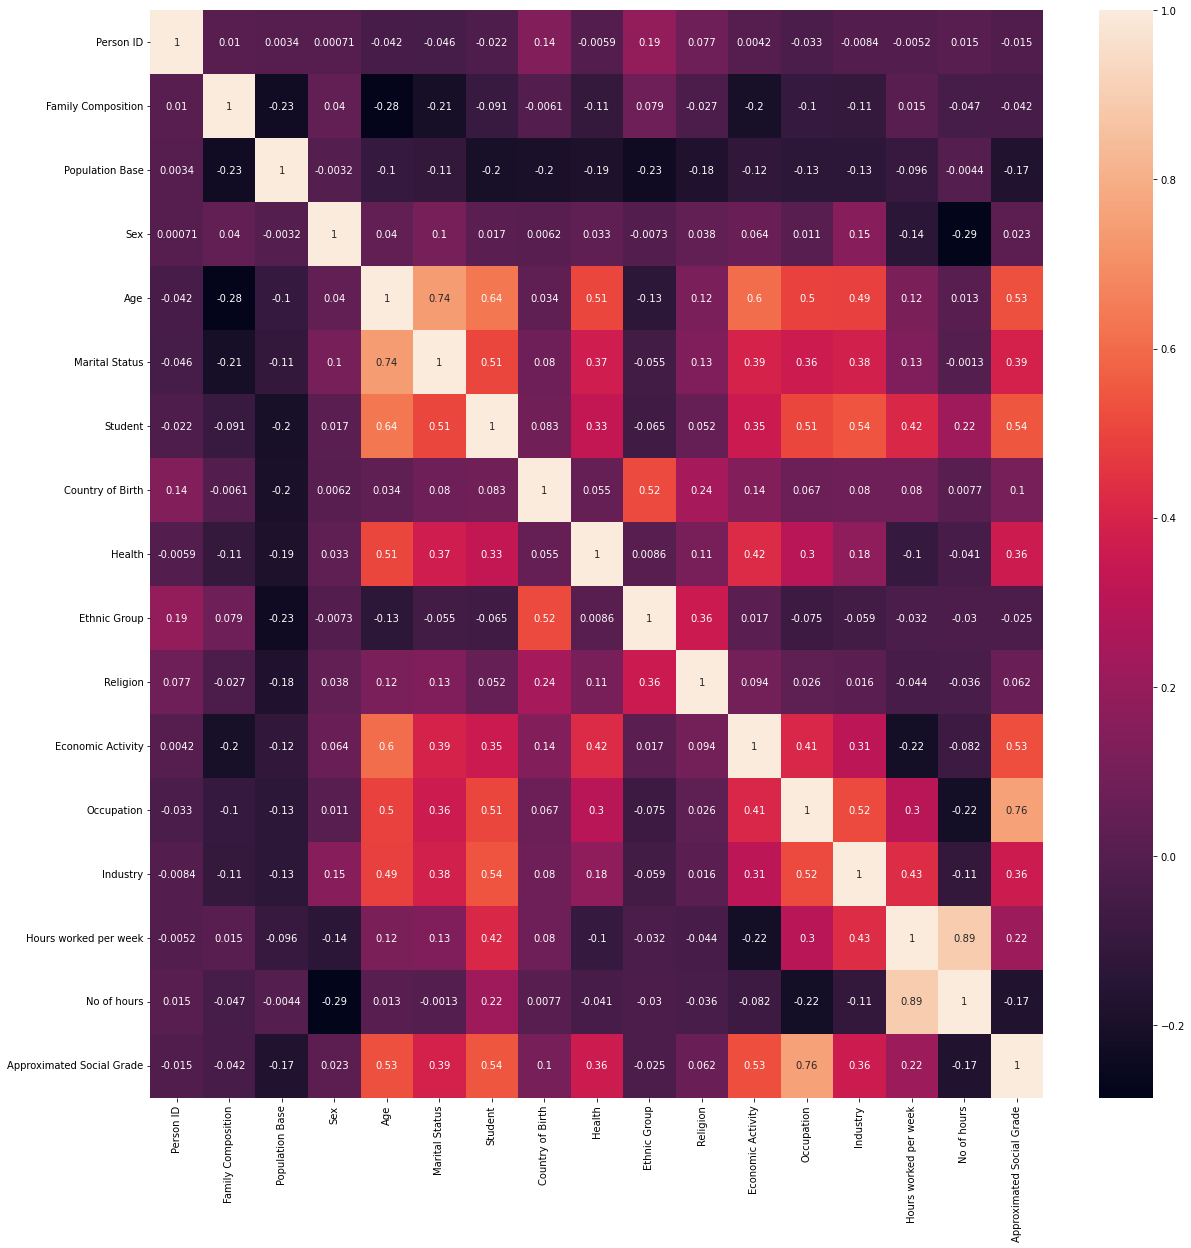

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method ='spearman'), annot=True)
plt.show()

In [16]:
#df1.to_csv('Census New', index=False)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569740 entries, 0 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  569740 non-null  int64  
 1   Region                     569740 non-null  object 
 2   Residence Type             569740 non-null  object 
 3   Family Composition         569740 non-null  object 
 4   Population Base            569740 non-null  object 
 5   Sex                        569740 non-null  object 
 6   Age                        569740 non-null  object 
 7   Marital Status             569740 non-null  object 
 8   Student                    569740 non-null  object 
 9   Country of Birth           569740 non-null  object 
 10  Health                     569740 non-null  object 
 11  Ethnic Group               569740 non-null  object 
 12  Religion                   569740 non-null  object 
 13  Economic Activity          56

In [18]:
#Encoding the Region and Residence Type column
encoder =OrdinalEncoder()
df[['Region', 'Residence Type']]= encoder.fit_transform(df[['Region', 'Residence Type']])
df[['Region', 'Residence Type']]=df[['Region', 'Residence Type']].astype(int)
df.head()

Person ID  Region  Residence Type  Family Composition  Population Base  \
0    7394816       0               1                   2                1   
1    7394832       0               1                   3                1   
2    7394719       0               1                   2                1   
3    7394840       0               1                   1                1   
4    7394711       0               1                   2                1   

   Sex  Age  Marital Status  Student  Country of Birth  Health  Ethnic Group  \
0    2    6               2        2                 1       2             1   
1    2    1               1        2                 1       2             1   
2    1    7               2        2                 1       1             1   
3    2    6               4        2                 1       3             1   
4    1    1               1        1                 1       1             1   

   Religion  Economic Activity  Occupation  Industry  Hours worked per week  \
0         2                  5           8         2                     -9   
1         1                 -9          -9        -9                     -9   
2         2                  5           8         2                     -9   
3         2                  5           9         5                     -9   
4         1                 -9          -9        -9                     -9   

   No of hours  Approximated Social Grade  
0          NaN                          4  
1          NaN                         -9  
2          NaN                          2  
3          NaN                          4  
4          NaN                         -9

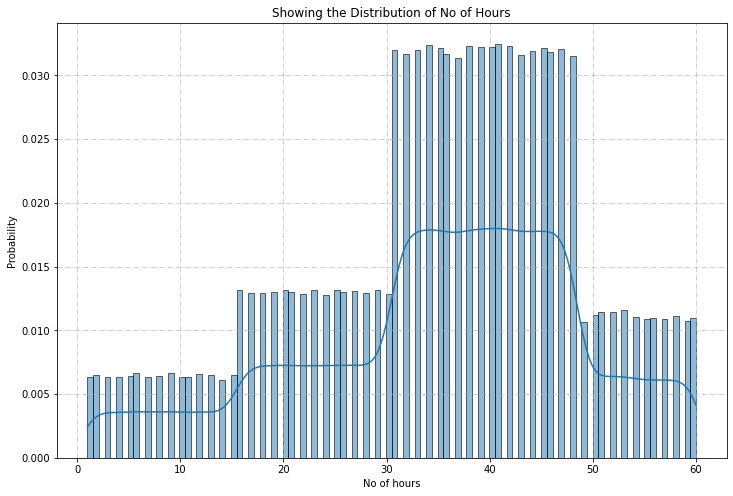

In [19]:
plt.figure(figsize= (12,8))
ax = sns.histplot(data = df1, x='No of hours',stat='probability', kde=True)
#sns.displot(data = df1, x='No of hours', kde=True, col= 'Sex')

ax.set_title(f'Showing the Distribution of No of Hours')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

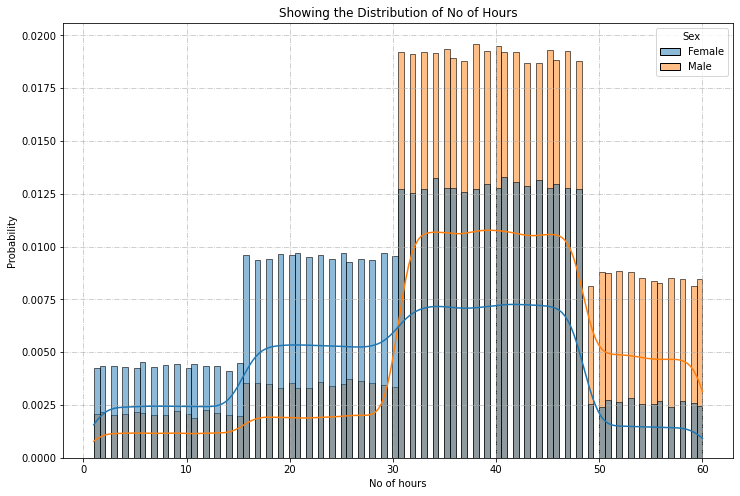

In [20]:
plt.figure(figsize= (12,8))
ax = sns.histplot(data = df1, x='No of hours',stat='probability', hue= 'Sex', kde=True)
#sns.displot(data = df1, x='No of hours', kde=True, col= 'Sex')

ax.set_title(f'Showing the Distribution of No of Hours')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

In [21]:
categ_cols = list(df1.columns)
categ_cols = np.delete(categ_cols, [0, -2])
categ_cols= list(categ_cols)
categ_cols

['Region',
 'Residence Type',
 'Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']

In [22]:
df1['No of hours'].describe()

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64

In [23]:
df1['No of hours'].median()

37.0

In [24]:
df1['No of hours'].skew(axis=0, skipna=True)

-0.5284151149324514

In [25]:
df1['No of hours'].kurtosis(axis=0, skipna=True)

-0.21133862298454176

In [26]:
IQR=df1['No of hours'].quantile(0.75)-df1['No of hours'].quantile(0.25)
IQR

18.0

In [27]:
df1['No of hours'].var()

182.81421337517486

In [28]:
categ_cols

['Region',
 'Residence Type',
 'Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']

In [29]:
df1_train = df1.loc[df1['No of hours'].isnull()==False]
df1_test = df1.loc[df1['No of hours'].isnull()==True]
print(f'The Length of Train set is: {len(df1_train)}')
print(f'The Length of Test set is: {len(df1_test)}')

The Length of Train set is: 267419
The Length of Test set is: 302321


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Region  Average Hours Worked Per Week
0                    London                      36.258909
1                South East                      35.420905
2           East of England                      35.343371
3             East Midlands                      35.174764
4             West Midlands                      35.024394
5                North East                      35.007881
6                North West                      34.981887
7                     Wales                      34.812619
8  Yorkshire and the Humber                      34.660010
9                South West                      34.645369

None


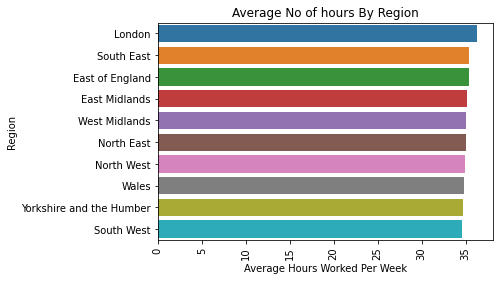

  6%|████▉                                                                              | 1/17 [00:00<00:06,  2.31it/s]

Residence Type  Average Hours Worked Per Week
0  Not resident in a communal establishment                      35.261610
1      Resident in a communal establishment                      31.106025

None


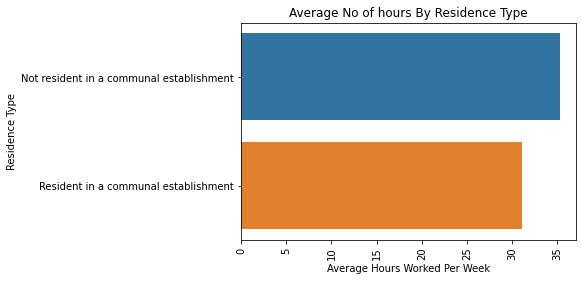

 12%|█████████▊                                                                         | 2/17 [00:00<00:05,  2.56it/s]

Family Composition  \
0                           Cohabiting couple family   
1                                    Not in a family   
2                     Lone parent family (male head)   
3                               Other related family   
4   Married/same-sex civil partnership couple family   
5  No code required (Resident of a communal estab...   
6                   Lone parent family (female head)   

   Average Hours Worked Per Week  
0                      36.937174  
1                      36.773351  
2                      36.614801  
3                      35.808371  
4                      34.888896  
5                      31.765882  
6                      30.939761

None


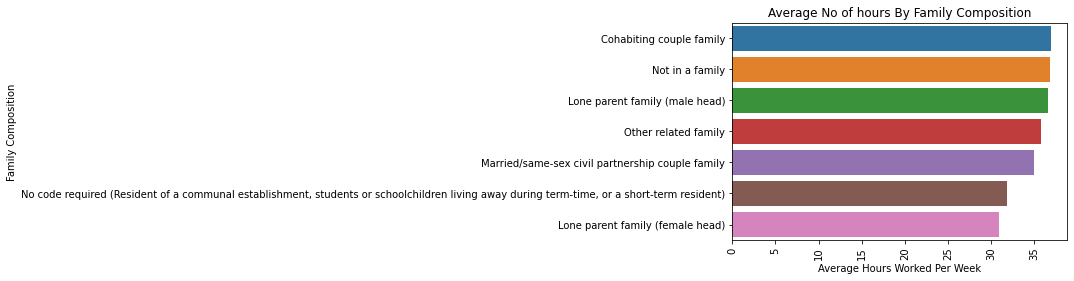

 18%|██████████████▋                                                                    | 3/17 [00:01<00:06,  2.28it/s]

Population Base  \
0                                  Usual resident   
1                             Short-term resident   
2  Student living away from home during term-time   

   Average Hours Worked Per Week  
0                      35.237436  
1                      33.991197  
2                            NaN

None


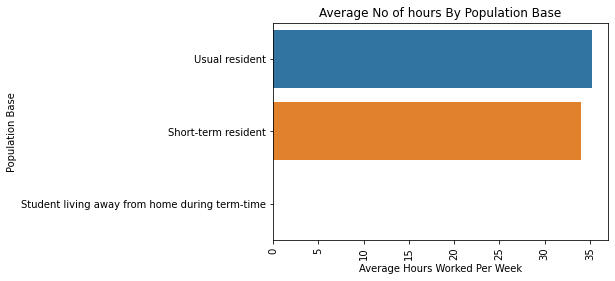

 24%|███████████████████▌                                                               | 4/17 [00:01<00:05,  2.46it/s]

Sex  Average Hours Worked Per Week
0    Male                      38.883628
1  Female                      31.127365

None


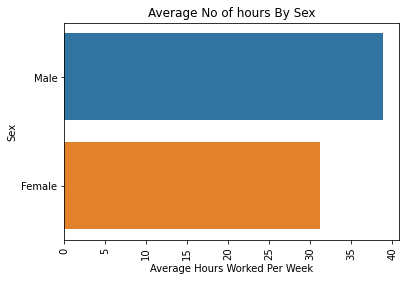

 29%|████████████████████████▍                                                          | 5/17 [00:01<00:04,  2.76it/s]

Age  Average Hours Worked Per Week
0     25 to 34                      37.145725
1     45 to 54                      36.721645
2     35 to 44                      36.343048
3     55 to 64                      34.465195
4     16 to 24                      30.048898
5  75 and over                      27.622718
6     65 to 74                      27.506356
7      0 to 15                            NaN

None


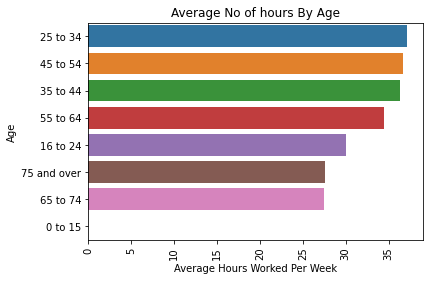

 35%|█████████████████████████████▎                                                     | 6/17 [00:02<00:03,  2.77it/s]

Marital Status  \
0  Divorced or formerly in a same-sex civil partn...   
1  Married or in a registered same-sex civil part...   
2  Separated but still legally married or separat...   
3  Single (never married or never registered a sa...   
4  Widowed or surviving partner from a same-sex c...   

   Average Hours Worked Per Week  
0                      35.767441  
1                      35.414613  
2                      35.278693  
3                      35.051520  
4                      30.504280

None


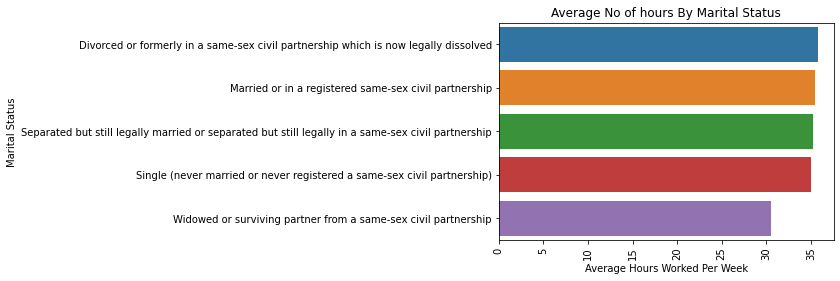

 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:04,  2.40it/s]

Student  Average Hours Worked Per Week
0      No                      35.981695
1     Yes                      17.423952

None


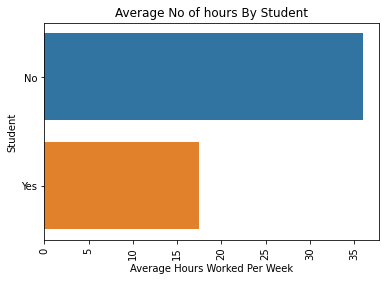

 47%|███████████████████████████████████████                                            | 8/17 [00:03<00:03,  2.70it/s]

Country of Birth  \
0                                             Non UK   
1                                                 UK   
2  No Code required (Students or schoolchildren l...   

   Average Hours Worked Per Week  
0                      35.523327  
1                      35.181109  
2                            NaN

None


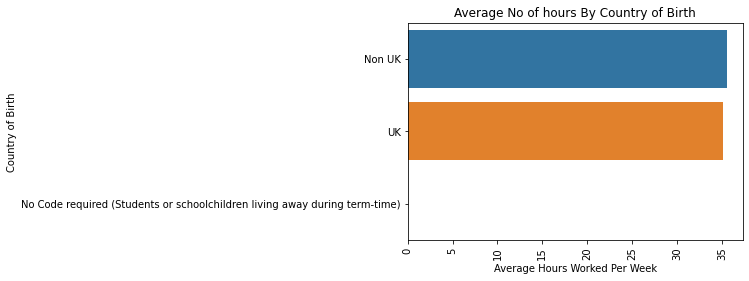

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:03<00:02,  2.79it/s]

Health  \
0                                   Very good health   
1                                        Good health   
2                                    Very bad health   
3                                        Fair health   
4                                         Bad health   
5  No code required (Students or schoolchildren l...   

   Average Hours Worked Per Week  
0                      35.667316  
1                      35.109846  
2                      34.349693  
3                      33.738738  
4                      32.685037  
5                            NaN

None


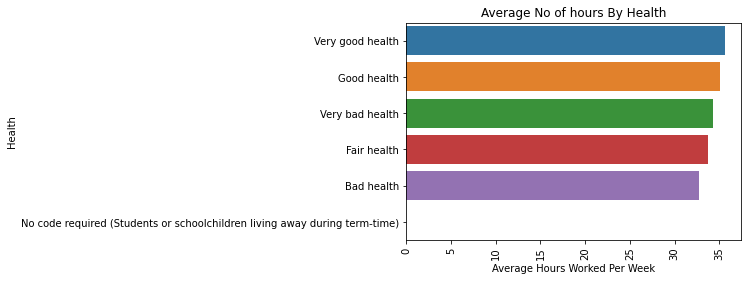

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:03<00:02,  2.64it/s]

Ethnic Group  \
0                                              White   
1                                              Mixed   
2                      Chinese or Other ethnic group   
3                             Black or Black British   
4                            Asian and Asian British   
5  No code required (Not resident in England or W...   

   Average Hours Worked Per Week  
0                      35.379858  
1                      34.494112  
2                      34.271982  
3                      34.106049  
4                      34.083520  
5                            NaN

None


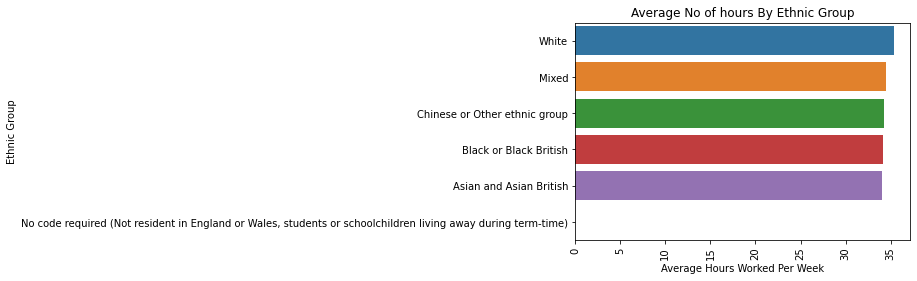

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:04<00:02,  2.63it/s]

Religion  \
0                                        No religion   
1                                              Hindu   
2                                               Sikh   
3                                         Not stated   
4                                     Other religion   
5                                             Jewish   
6                                          Christian   
7                                           Buddhist   
8                                             Muslim   
9  No code required (Not resident in England or W...   

   Average Hours Worked Per Week  
0                      36.078003  
1                      35.749083  
2                      35.583060  
3                      35.455942  
4                      35.296643  
5                      35.094963  
6                      34.997413  
7                      34.332597  
8                      31.541602  
9                            NaN

None


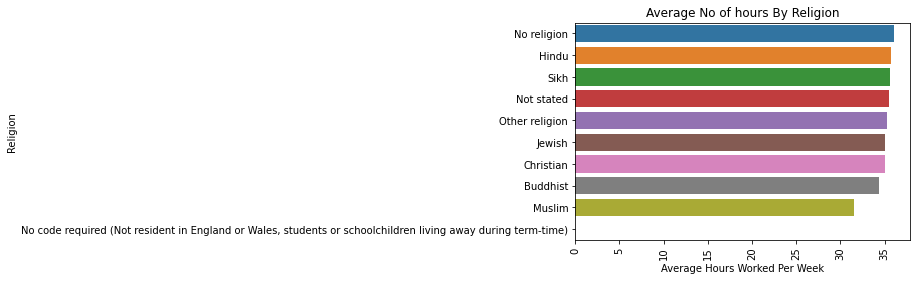

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:04<00:01,  2.53it/s]

Economic Activity  \
0                 Economically active: Self-employed   
1                      Economically active: Employee   
2             Economically active: Full-time student   
3                    Economically active: Unemployed   
4  Economically inactive: Long-term sick or disabled   
5  Economically inactive: Looking after home or f...   
6                       Economically inactive: Other   
7                     Economically inactive: Retired   
8                     Economically inactive: Student   
9  No code required (Aged under 16 or students or...   

   Average Hours Worked Per Week  
0                      36.619733  
1                      35.861687  
2                      17.423952  
3                            NaN  
4                            NaN  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN

None


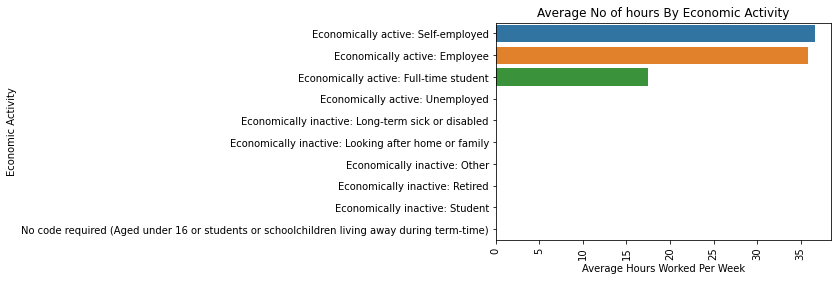

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:05<00:01,  2.26it/s]

Occupation  \
0           Managers, Directors and Senior Officials   
1                         Skilled Trades Occupations   
2              Process, Plant and Machine Operatives   
3                           Professional Occupations   
4   Associate Professional and Technical Occupations   
5         Administrative and Secretarial Occupations   
6      Caring, Leisure and Other Service Occupations   
7                             Elementary Occupations   
8             Sales and Customer Service Occupations   
9  No code required (People aged under 16, people...   

   Average Hours Worked Per Week  
0                      41.076202  
1                      39.059160  
2                      38.947948  
3                      37.824208  
4                      37.458838  
5                      32.443170  
6                      30.586433  
7                      29.344891  
8                      27.376550  
9                            NaN

None


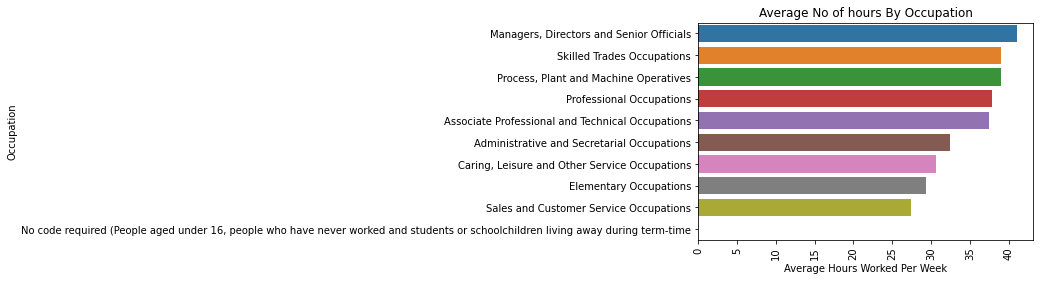

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:05<00:01,  2.02it/s]

Industry  \
0                   Agriculture, forestry and fishing   
1                                        Construction   
2   Mining and quarrying; Manufacturing; Electrici...   
3   Financial and insurance activities; Intermedia...   
4   Transport and storage; Information and communi...   
5   Public administration and defence; compulsory ...   
6   Real estate activities; Professional, scientif...   
7             Human health and social work activities   
8   Wholesale and retail trade; Repair of motor ve...   
9                                           Education   
10  Other community, social and personal service a...   
11          Accommodation and food service activities   
12  No code required (People aged under 16, people...   

    Average Hours Worked Per Week  
0                       41.164853  
1                       39.400039  
2                       39.120904  
3                       38.965036  
4                       38.622107  
5                       37.367239  
6                       35.893734  
7                       32.887285  
8                       32.594720  
9                       32.287255  
10                      31.842058  
11                      30.330633  
12                            NaN

None


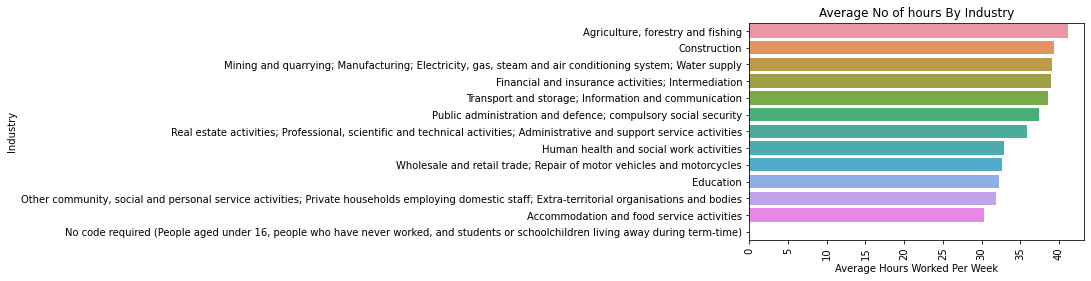

 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:06<00:01,  1.67it/s]

Hours worked per week  \
0                 Full-time: 49 or more hours worked   
1                   Full-time: 31 to 48 hours worked   
2                   Part-time: 16 to 30 hours worked   
3                 Part-time: 15 or less hours worked   
4  No code required (People aged under 16,people ...   

   Average Hours Worked Per Week  
0                      54.467714  
1                      39.495716  
2                      22.997372  
3                       7.995732  
4                            NaN

None


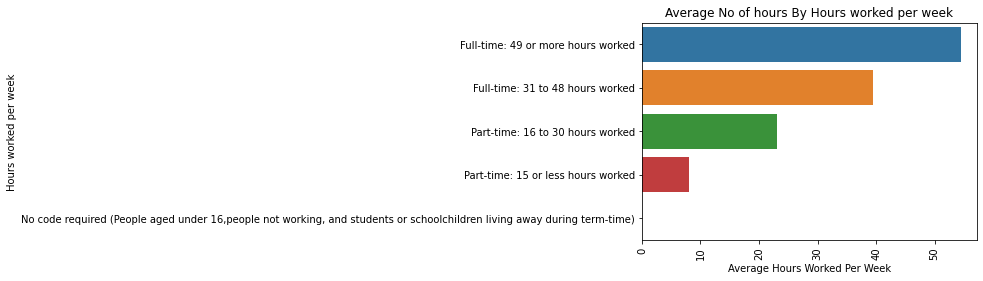

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:07<00:00,  1.77it/s]

Approximated Social Grade  \
0                                                 AB   
1                                                 C2   
2                                                 C1   
3  No code required (People aged under 16, people...   
4                                                 DE   

   Average Hours Worked Per Week  
0                      39.824520  
1                      37.945095  
2                      33.877158  
3                      31.765882  
4                      30.454920

None


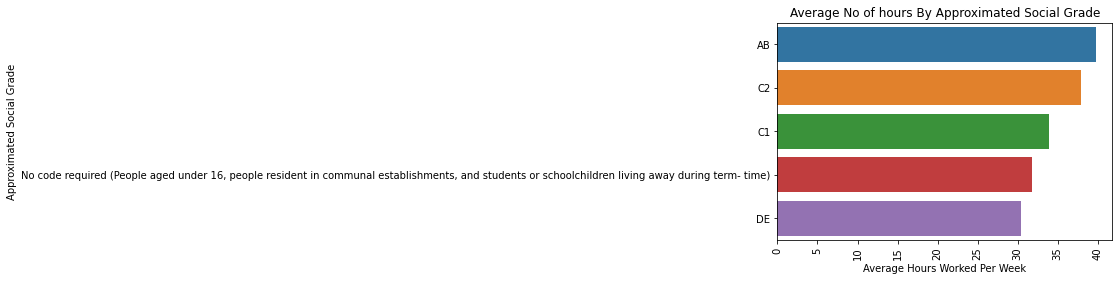

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.23it/s]


In [30]:
for col in tqdm(categ_cols):
    t = df1.groupby(col)["No of hours"].mean().reset_index(name = "Average Hours Worked Per Week")
    t.sort_values( "Average Hours Worked Per Week", ascending=False, inplace =True)
    t.reset_index(inplace=True, drop=True)
   # t = t.dropna(axis=0)
    #plt.figure(figsize=(12,10))
    ax = sns.barplot(data=t, x= "Average Hours Worked Per Week", y = col)
    ax.set_title(f"Average No of hours By {col}")
    plt.xticks(rotation= 90)
    print(display(t))
    plt.show()

In [31]:
df1[categ_cols]= df1[categ_cols].astype('category')

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

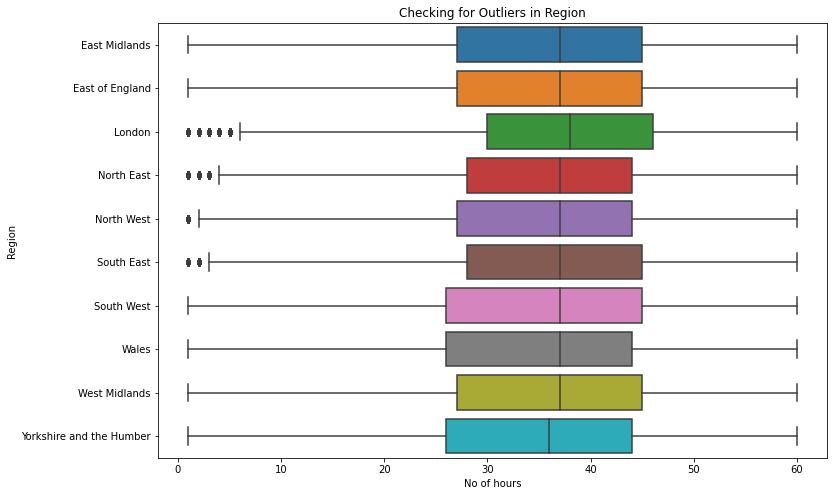

  6%|████▉                                                                              | 1/17 [00:00<00:10,  1.46it/s]

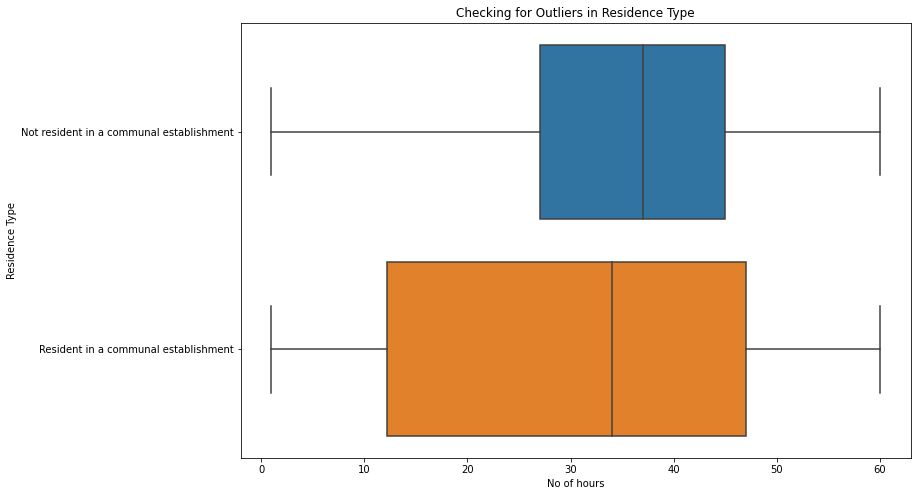

 12%|█████████▊                                                                         | 2/17 [00:00<00:06,  2.22it/s]

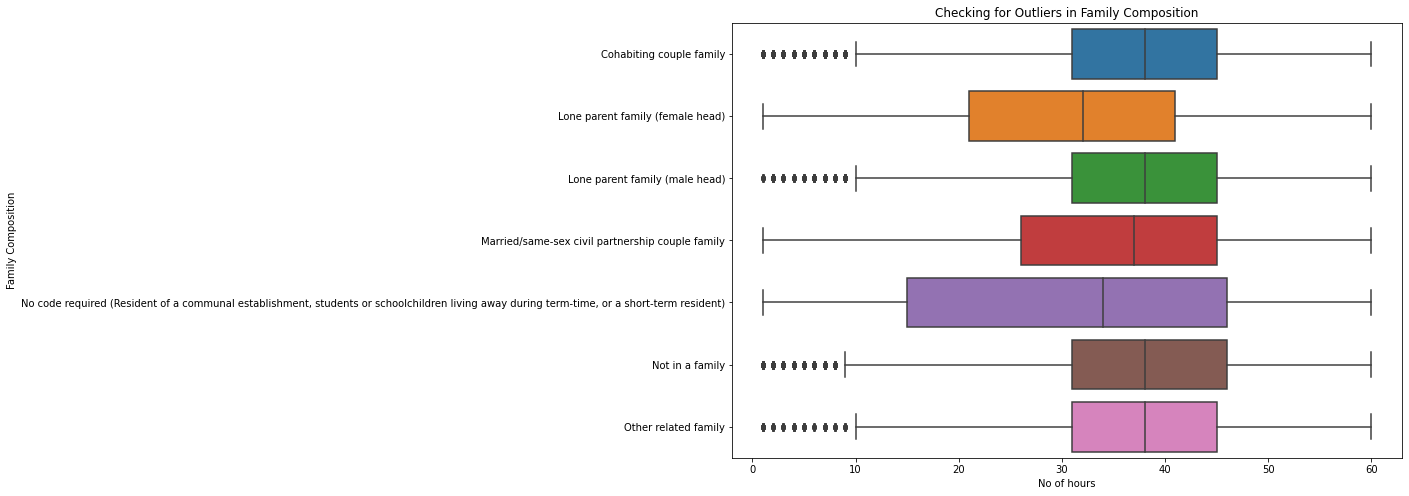

 18%|██████████████▋                                                                    | 3/17 [00:01<00:07,  1.95it/s]

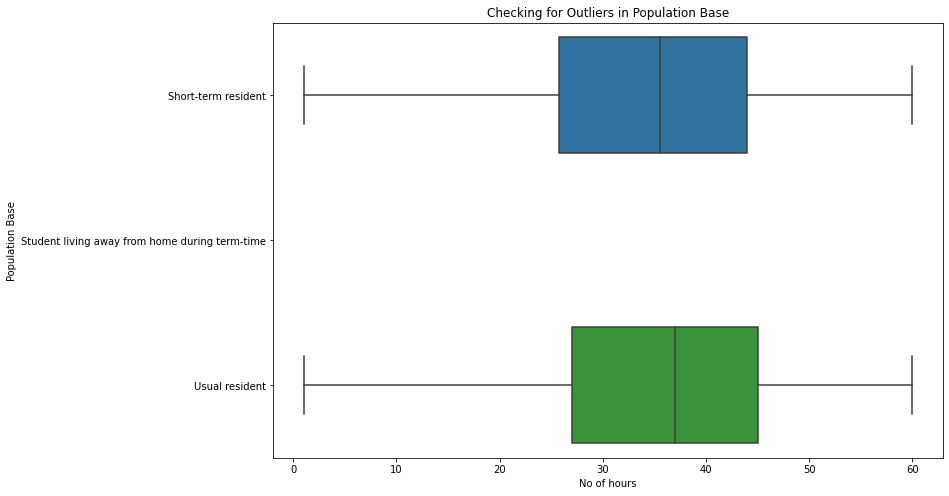

 24%|███████████████████▌                                                               | 4/17 [00:01<00:05,  2.33it/s]

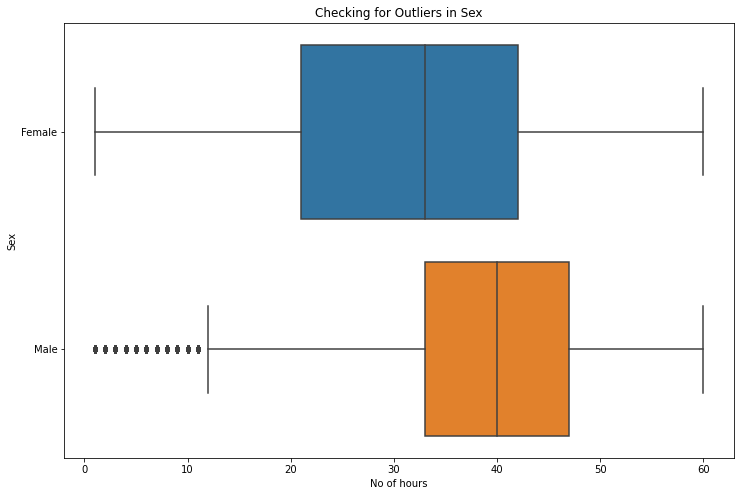

 29%|████████████████████████▍                                                          | 5/17 [00:02<00:04,  2.59it/s]

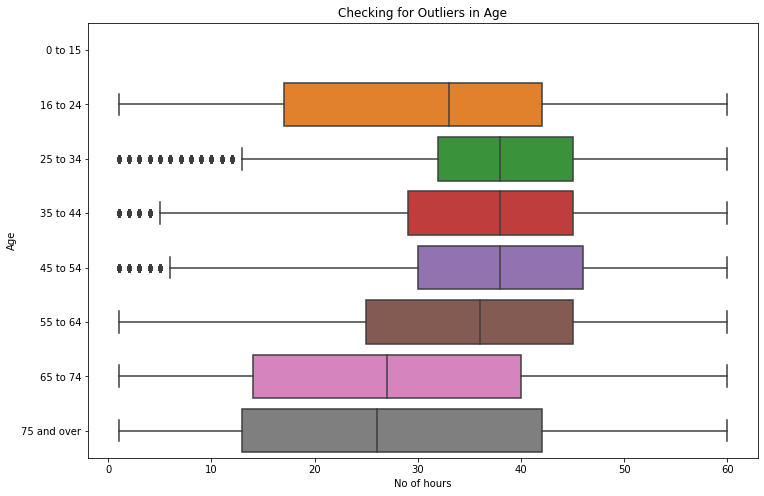

 35%|█████████████████████████████▎                                                     | 6/17 [00:02<00:04,  2.38it/s]

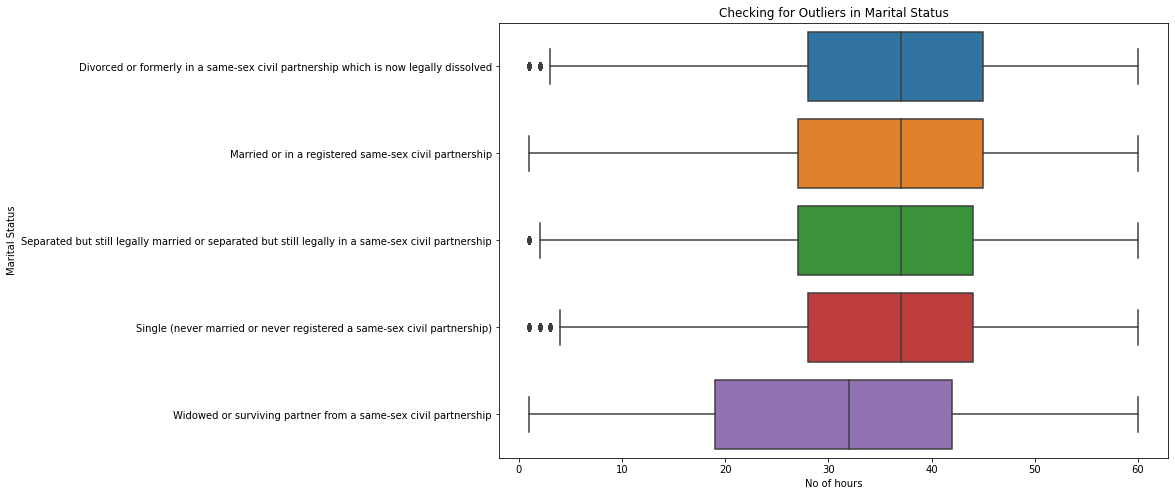

 41%|██████████████████████████████████▏                                                | 7/17 [00:03<00:04,  2.23it/s]

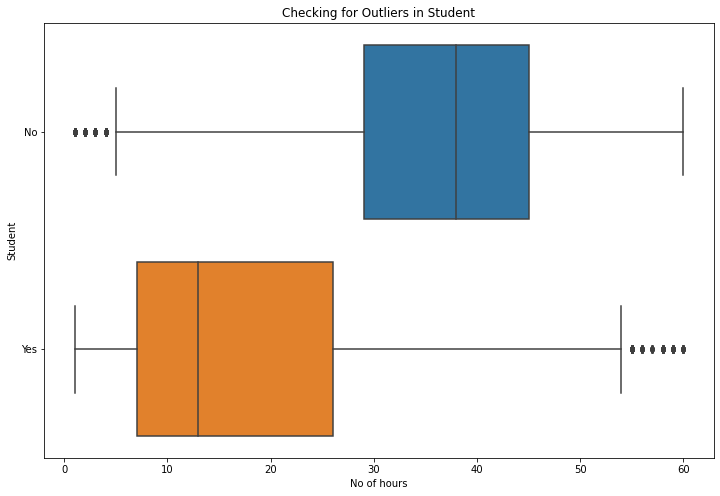

 47%|███████████████████████████████████████                                            | 8/17 [00:03<00:03,  2.51it/s]

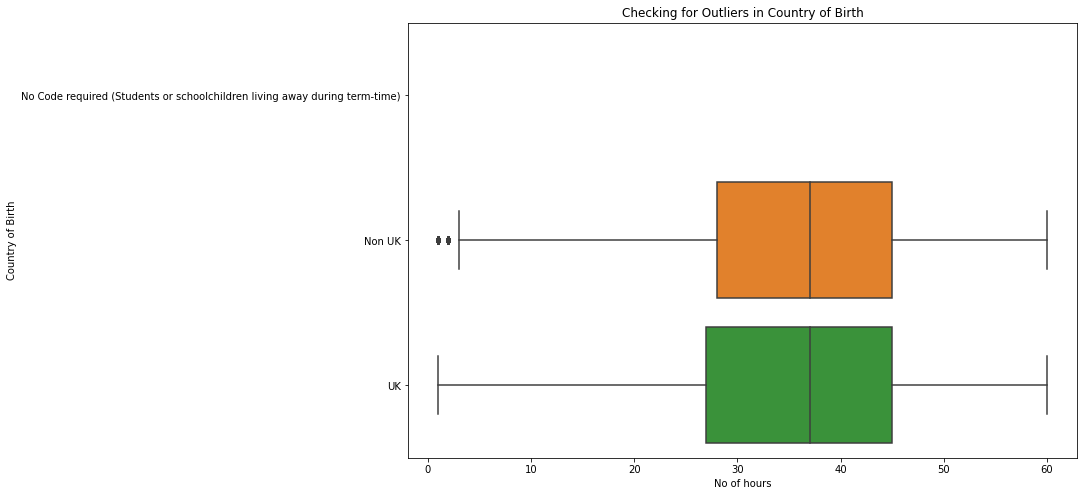

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:03<00:02,  2.69it/s]

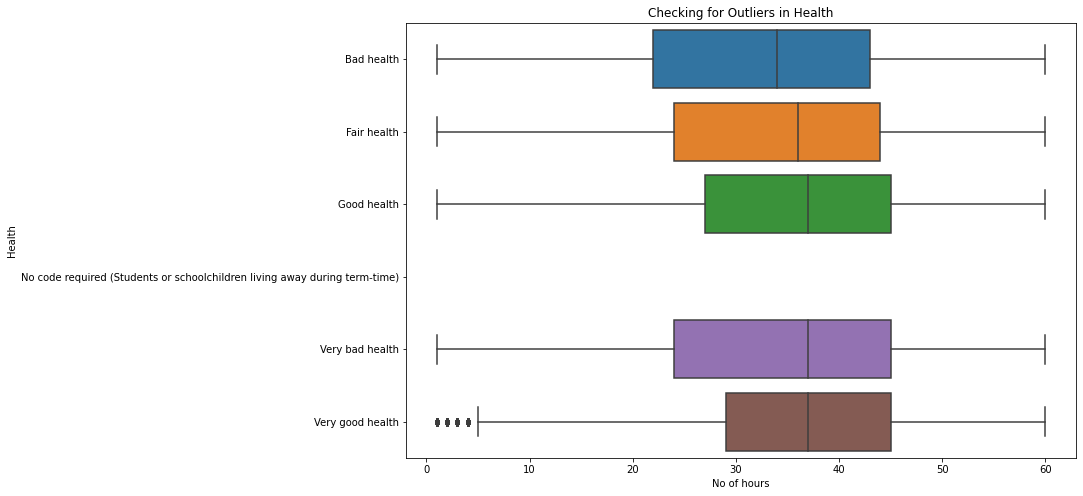

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:04<00:02,  2.61it/s]

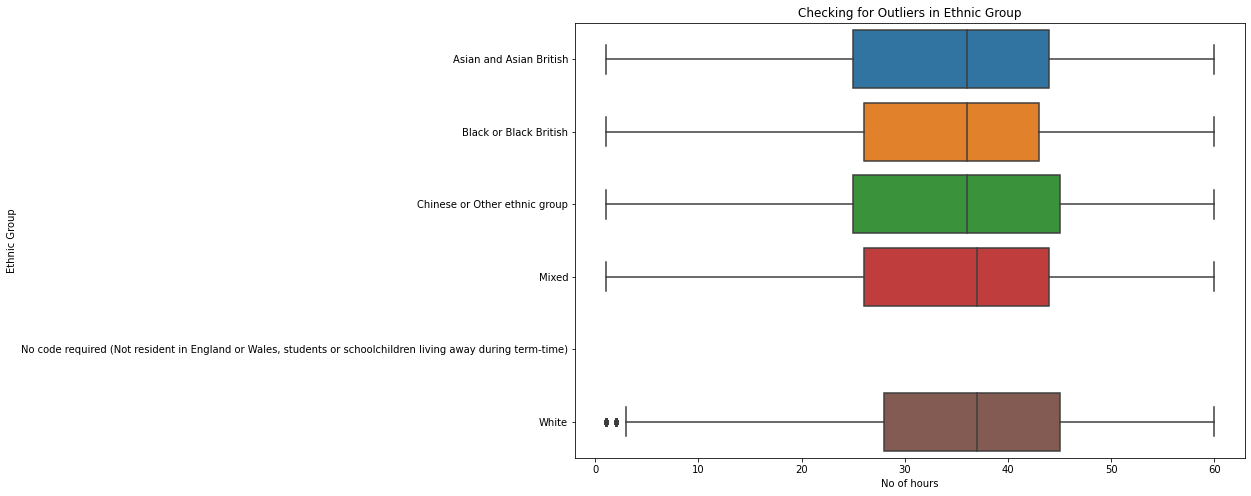

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:04<00:02,  2.48it/s]

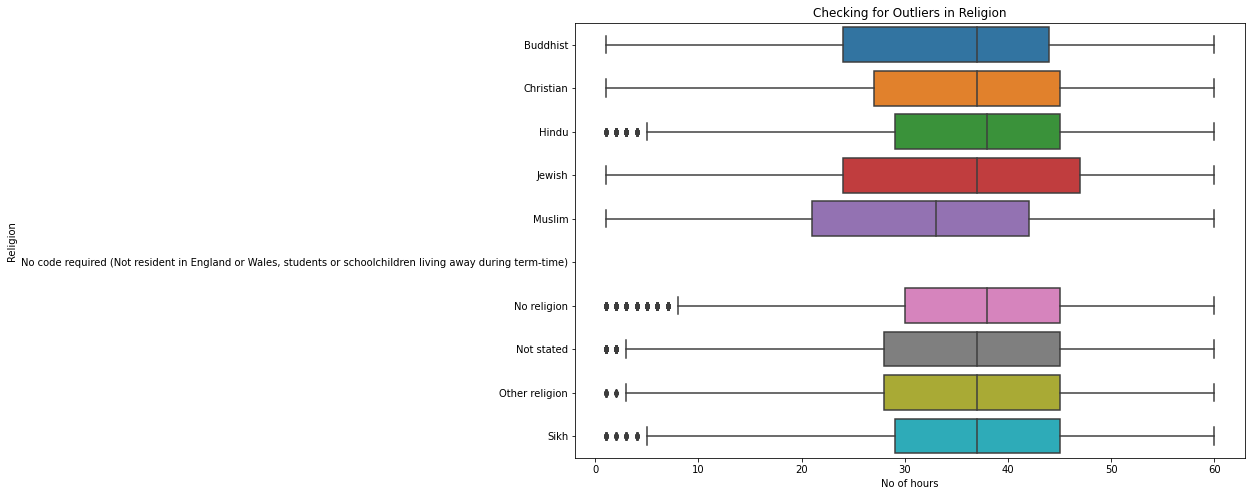

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:05<00:02,  2.21it/s]

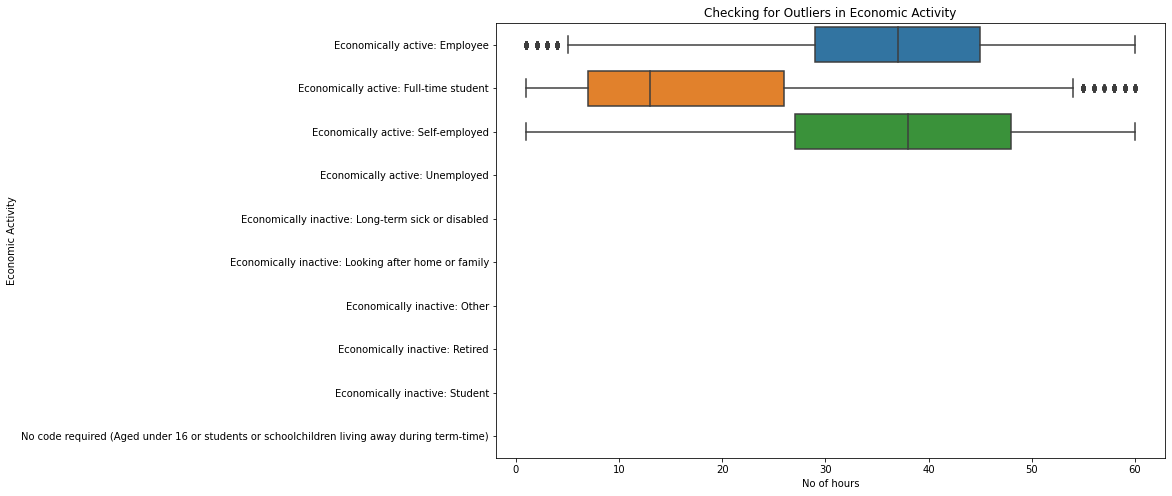

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:05<00:01,  2.15it/s]

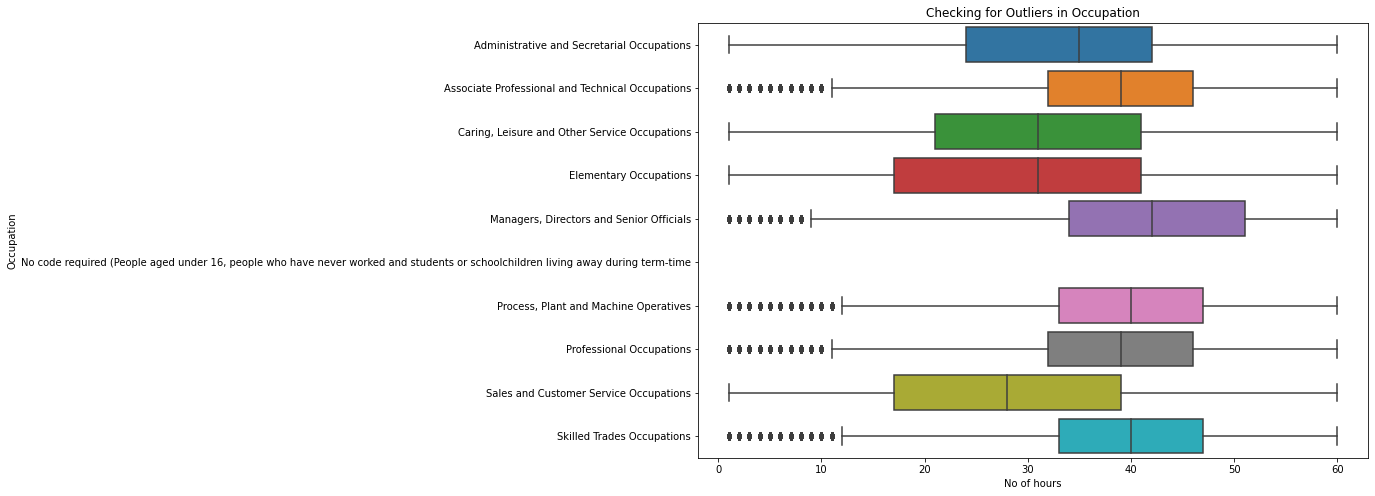

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:06<00:01,  1.97it/s]

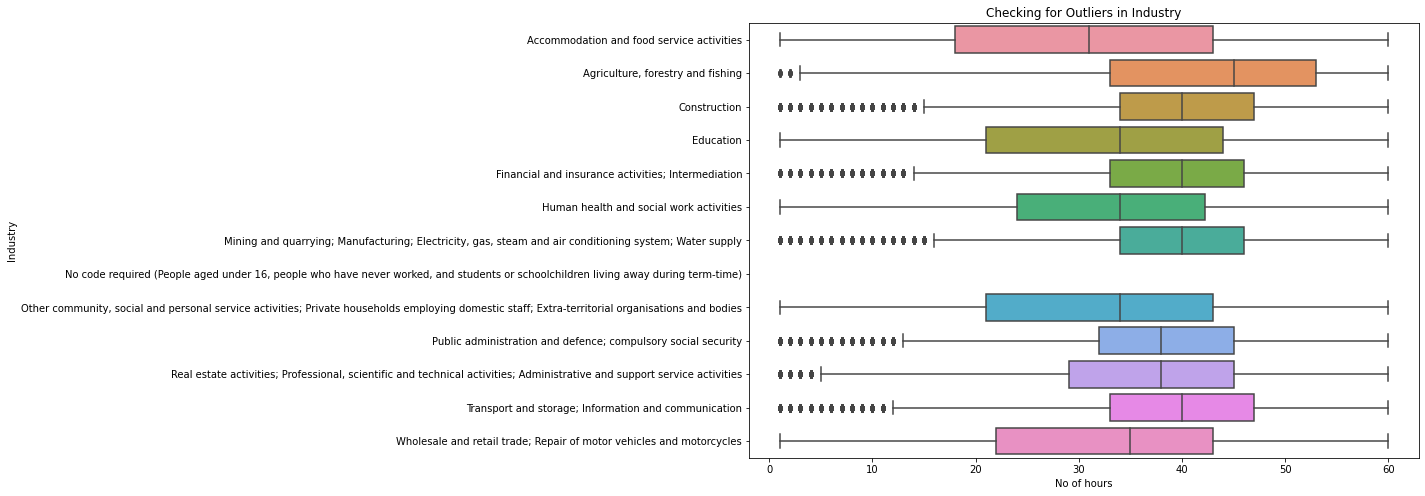

 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:07<00:01,  1.55it/s]

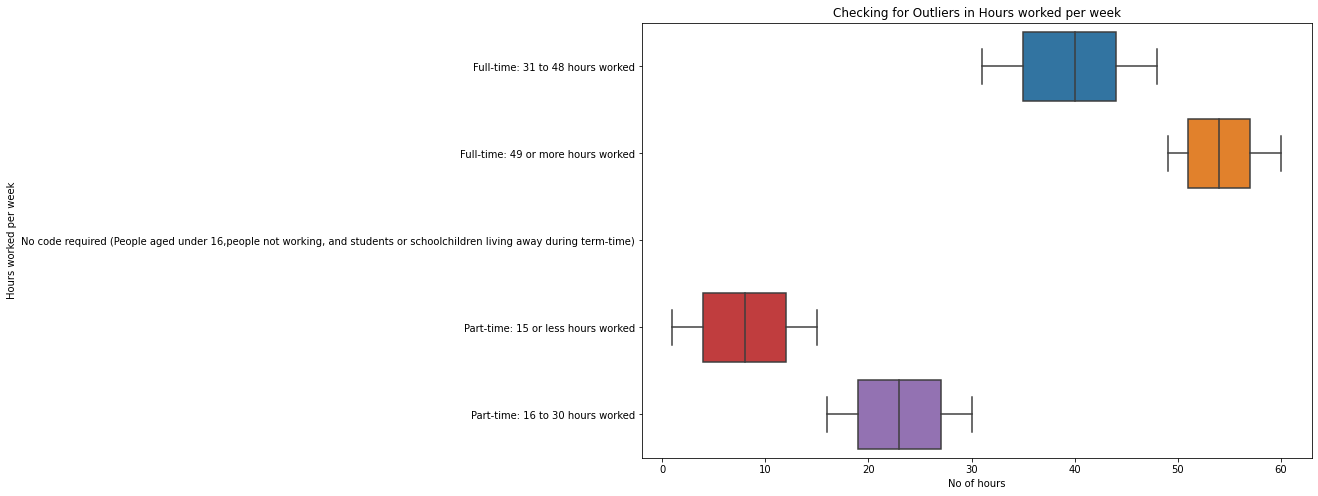

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:07<00:00,  1.73it/s]

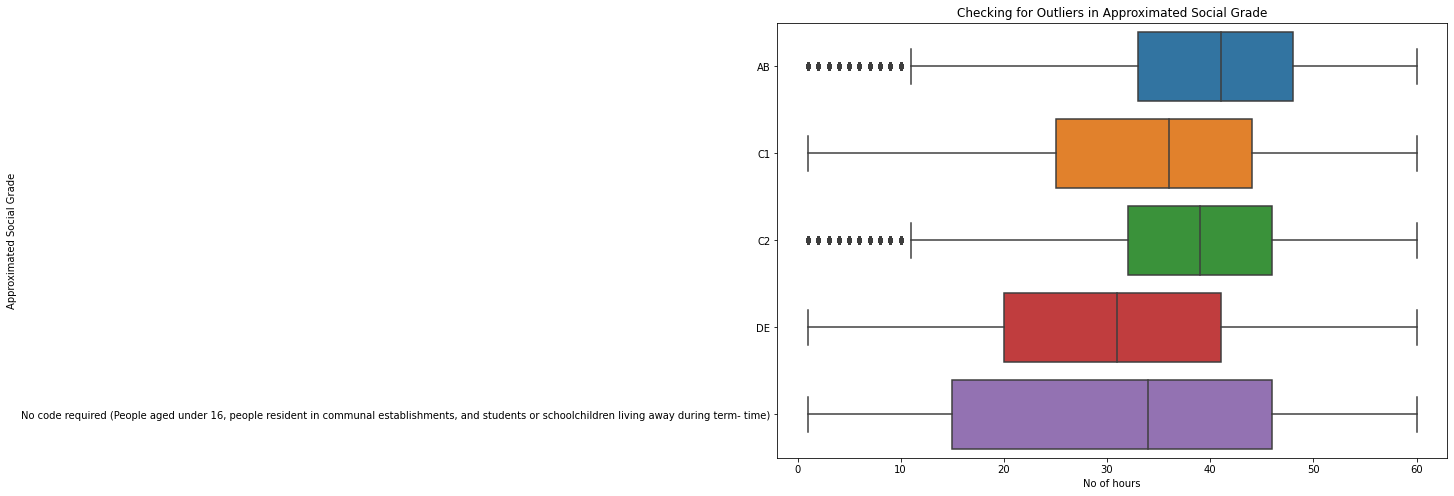

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.08it/s]


In [32]:
for col in tqdm(categ_cols):
    plt.figure(figsize= (12,8))
    ax = sns.boxplot(data = df1, y=col, x= 'No of hours')
    ax.set_title(f"Checking for Outliers in {col}")
    plt.show()

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

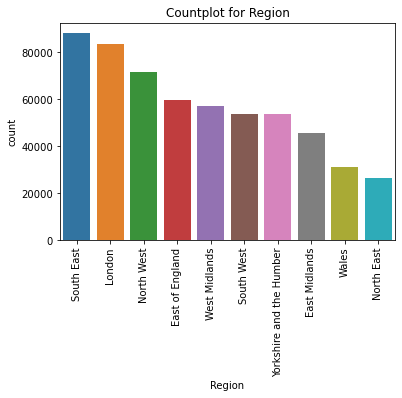

  6%|████▉                                                                              | 1/17 [00:00<00:05,  2.81it/s]

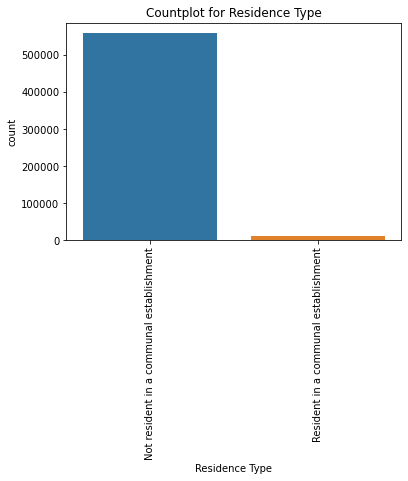

 12%|█████████▊                                                                         | 2/17 [00:00<00:04,  3.44it/s]

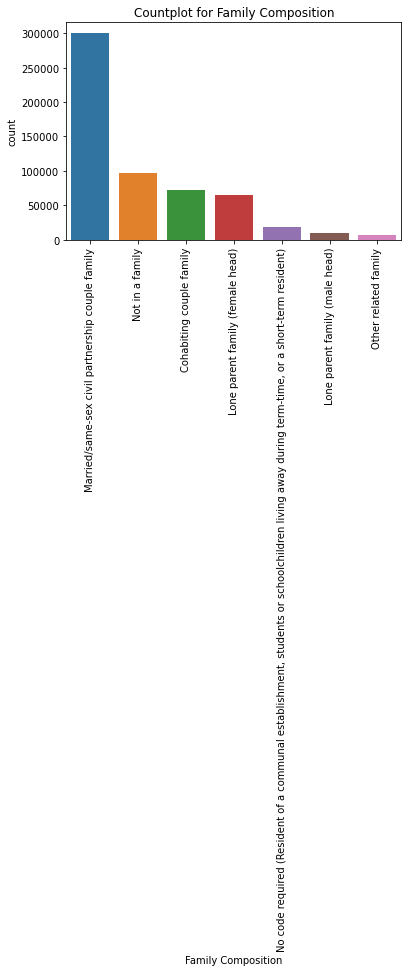

 18%|██████████████▋                                                                    | 3/17 [00:00<00:04,  2.99it/s]

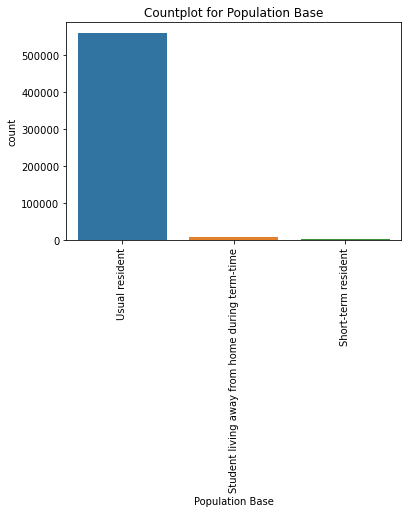

 24%|███████████████████▌                                                               | 4/17 [00:01<00:03,  3.35it/s]

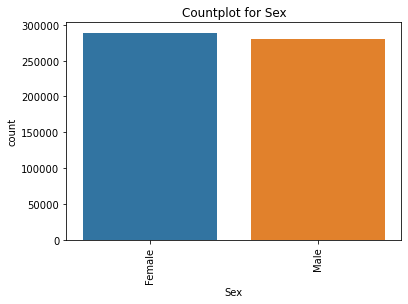

 29%|████████████████████████▍                                                          | 5/17 [00:01<00:03,  3.67it/s]

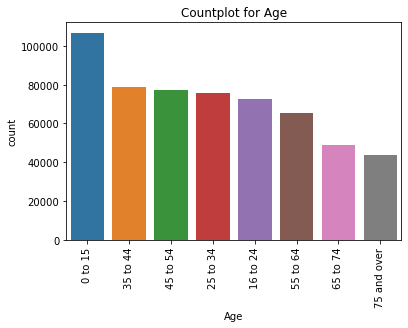

 35%|█████████████████████████████▎                                                     | 6/17 [00:01<00:03,  3.63it/s]

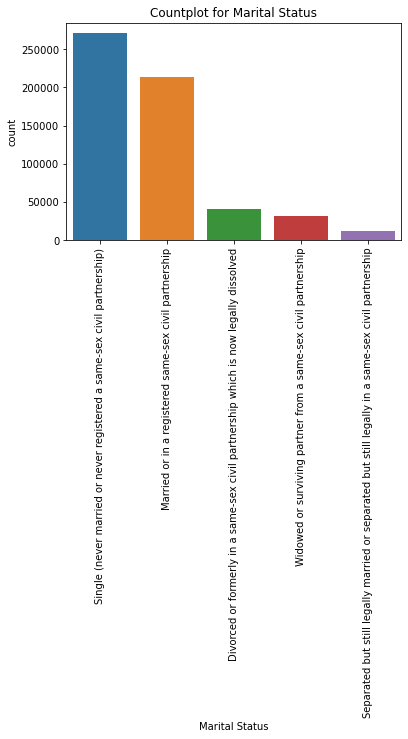

 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:03,  3.32it/s]

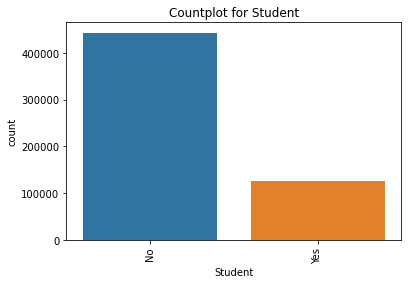

 47%|███████████████████████████████████████                                            | 8/17 [00:02<00:02,  3.70it/s]

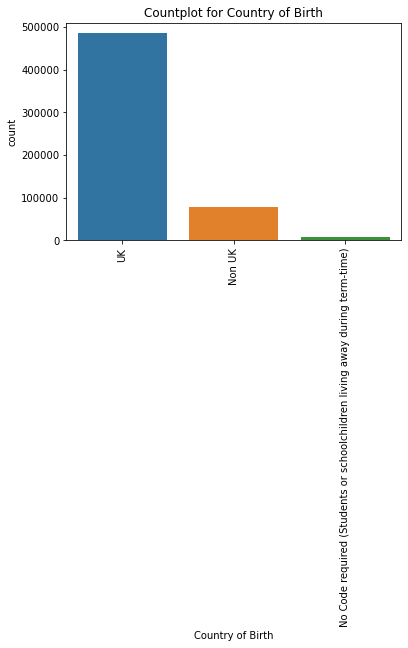

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:02<00:02,  3.75it/s]

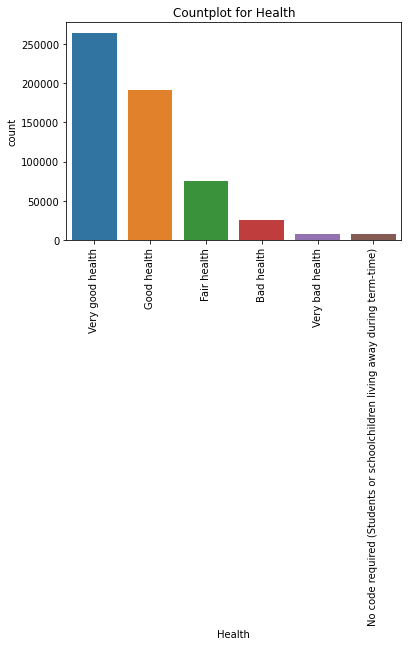

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:02<00:01,  3.67it/s]

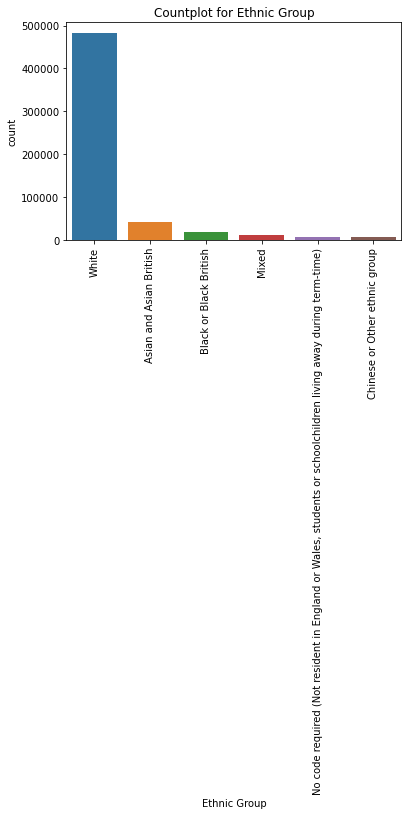

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:03<00:01,  3.43it/s]

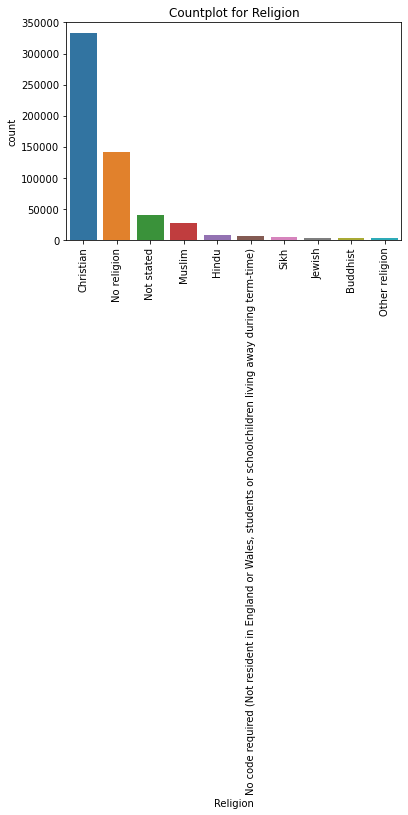

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:03<00:01,  3.13it/s]

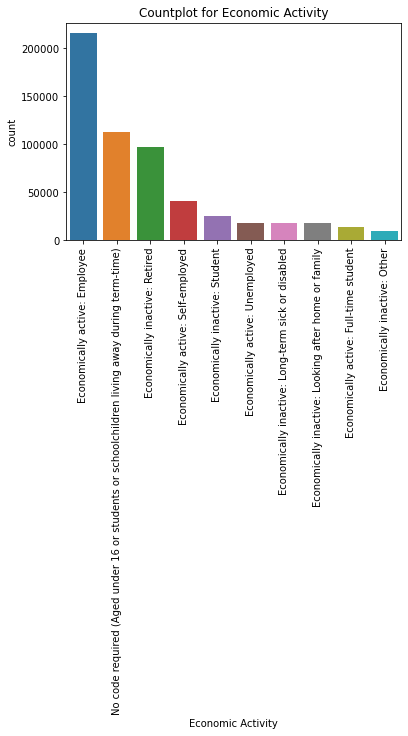

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:03<00:01,  2.85it/s]

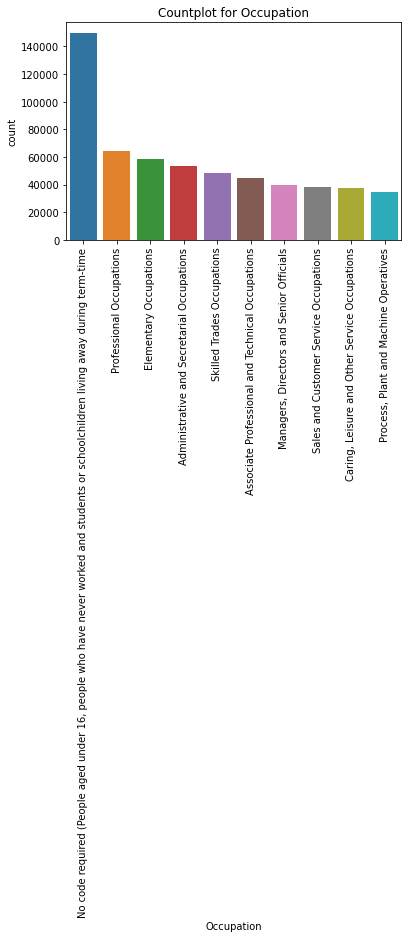

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:04<00:01,  2.68it/s]

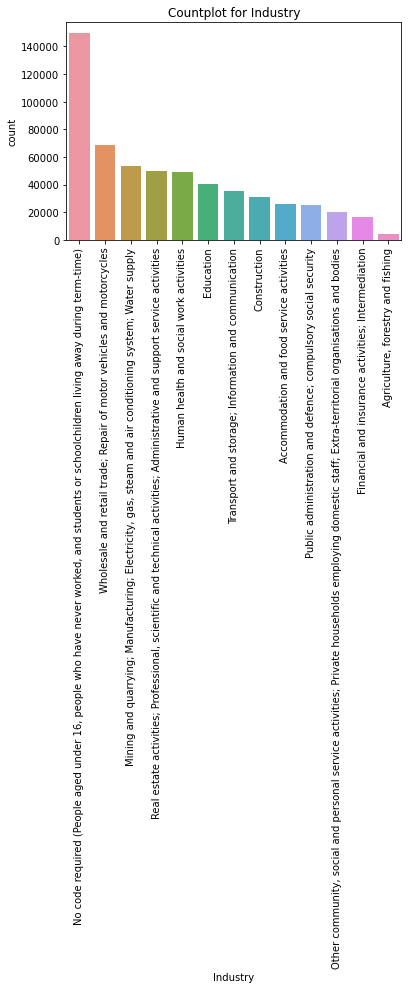

 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:04<00:00,  2.28it/s]

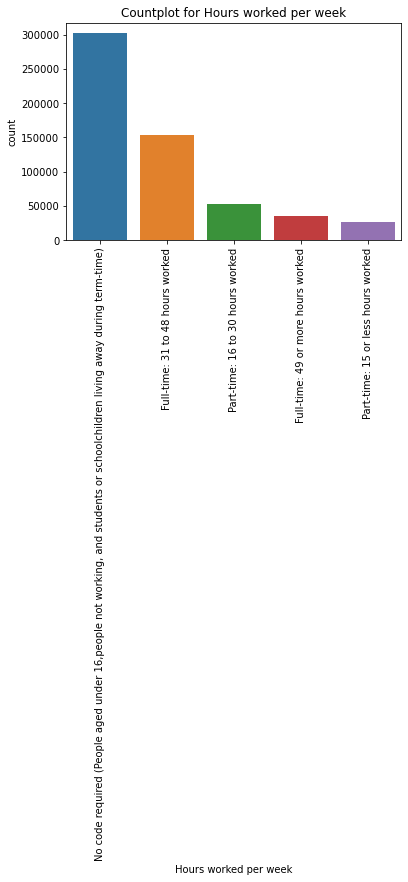

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:05<00:00,  2.44it/s]

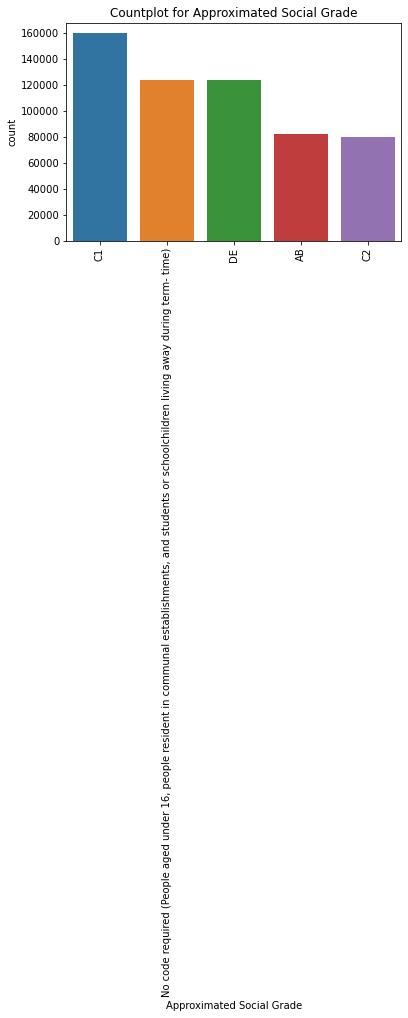

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  2.98it/s]


In [33]:
for col in tqdm(categ_cols):
    #plt.figure(figsize=(12,10))
    ax = sns.countplot(x=col, data= df1, order= df1[col].value_counts().index)
    ax.set_title(f"Countplot for {col}")
    plt.xticks(rotation= 90)
    plt.show()

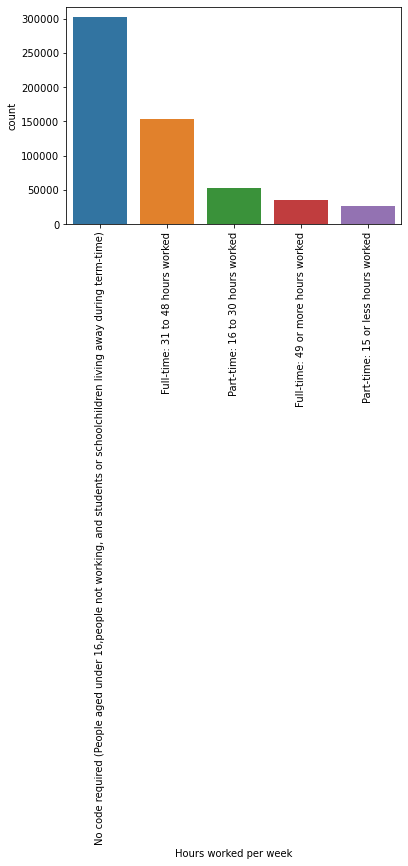

In [34]:
g = sns.countplot(x='Hours worked per week', data=df1, order= df1['Hours worked per week'].value_counts().index)
ax.set_title(f"Countplot for Hours worked per week")
plt.xticks(rotation= 90)
plt.show()

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

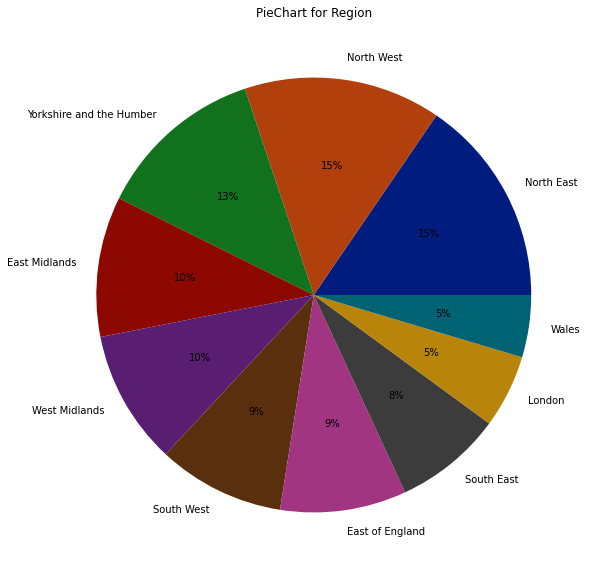

  6%|████▉                                                                              | 1/17 [00:00<00:11,  1.40it/s]

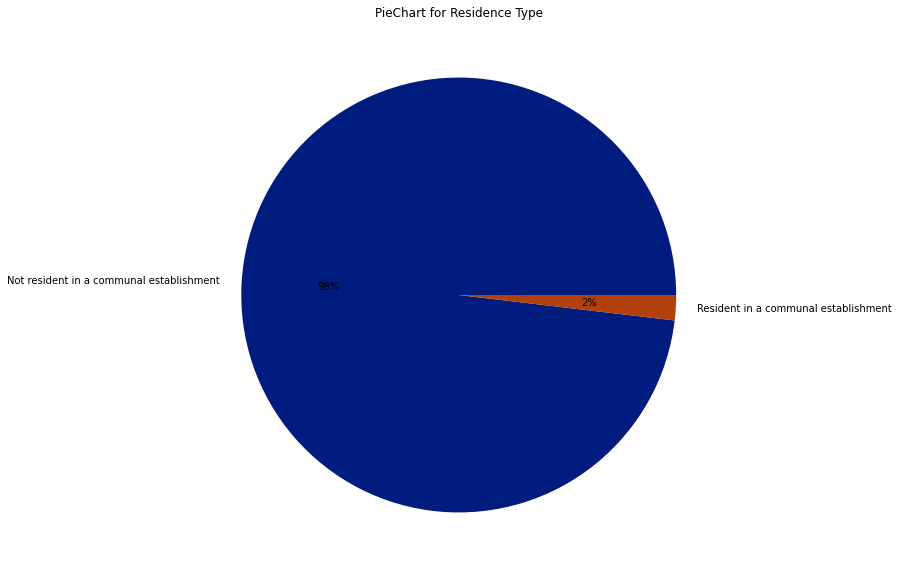

 12%|█████████▊                                                                         | 2/17 [00:00<00:06,  2.34it/s]

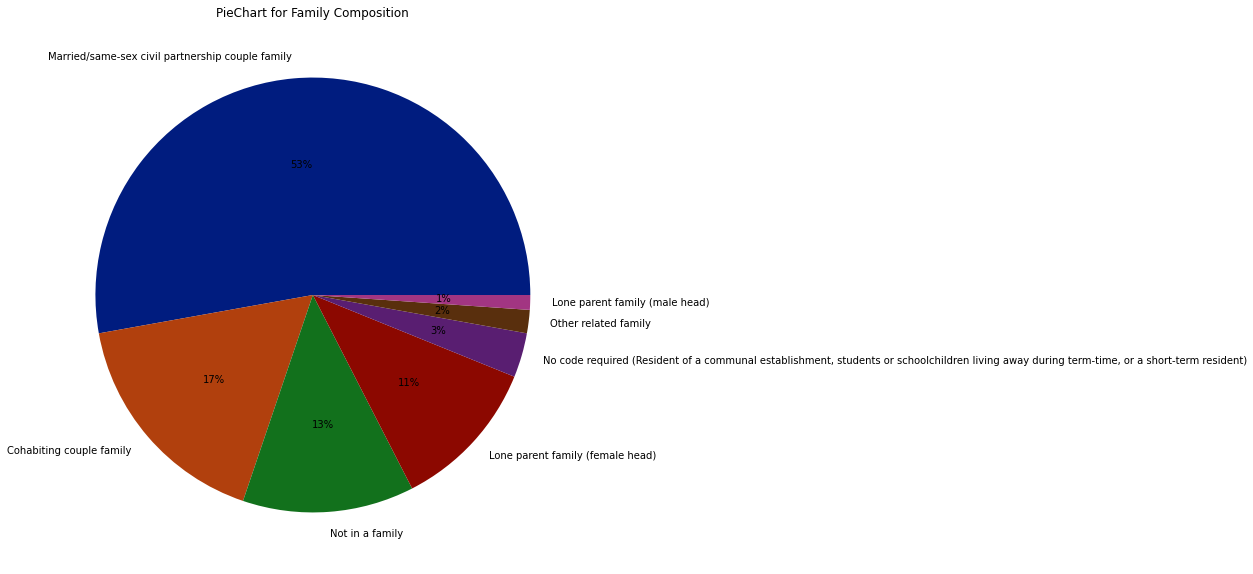

 18%|██████████████▋                                                                    | 3/17 [00:01<00:05,  2.48it/s]

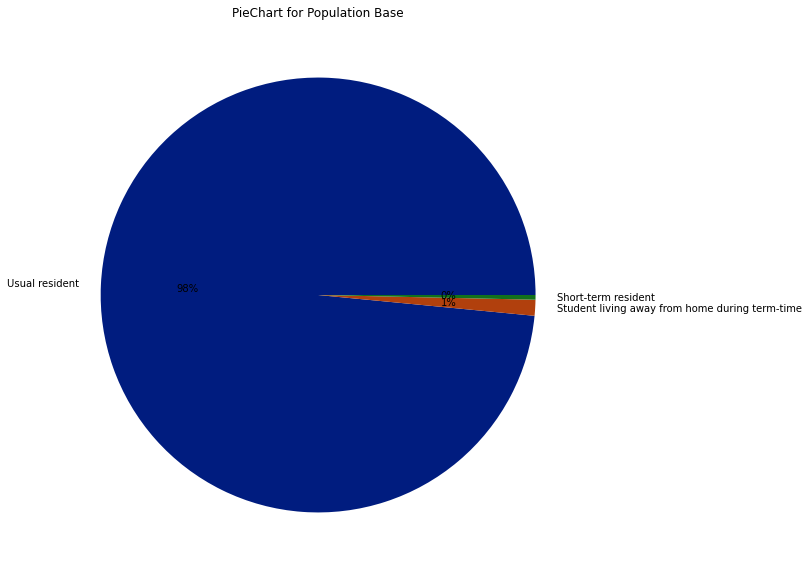

 24%|███████████████████▌                                                               | 4/17 [00:01<00:05,  2.34it/s]

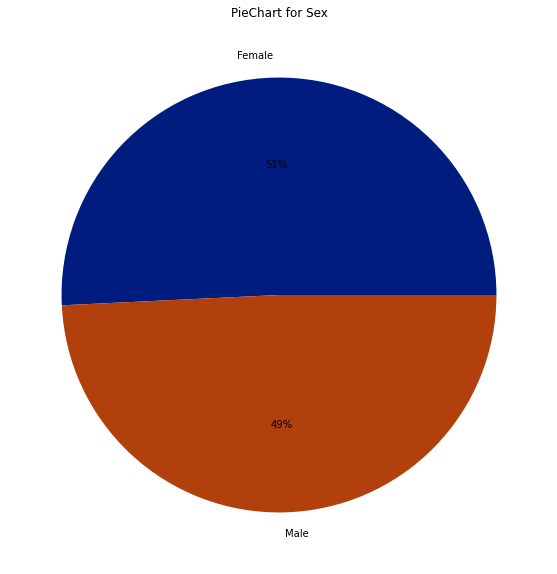

 29%|████████████████████████▍                                                          | 5/17 [00:01<00:04,  2.90it/s]

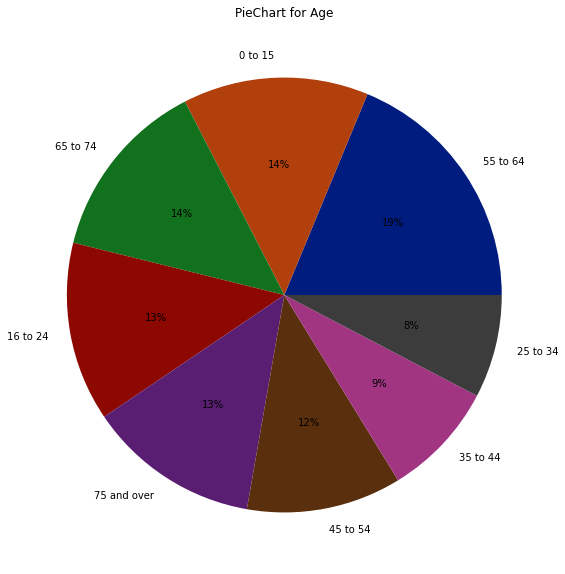

 35%|█████████████████████████████▎                                                     | 6/17 [00:02<00:03,  3.06it/s]

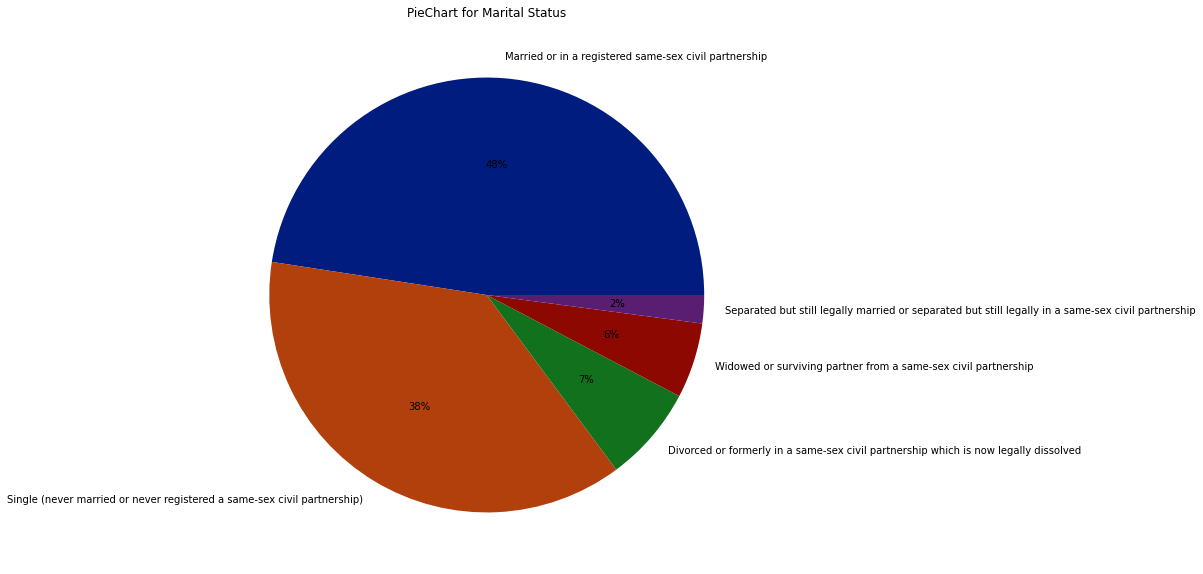

 41%|██████████████████████████████████▏                                                | 7/17 [00:02<00:03,  3.00it/s]

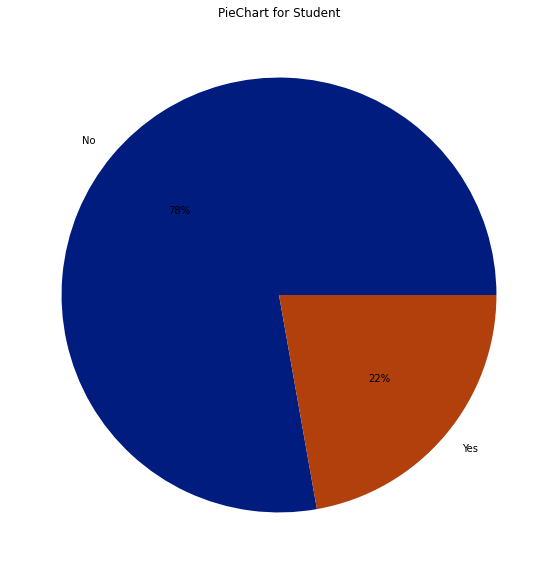

 47%|███████████████████████████████████████                                            | 8/17 [00:02<00:02,  3.36it/s]

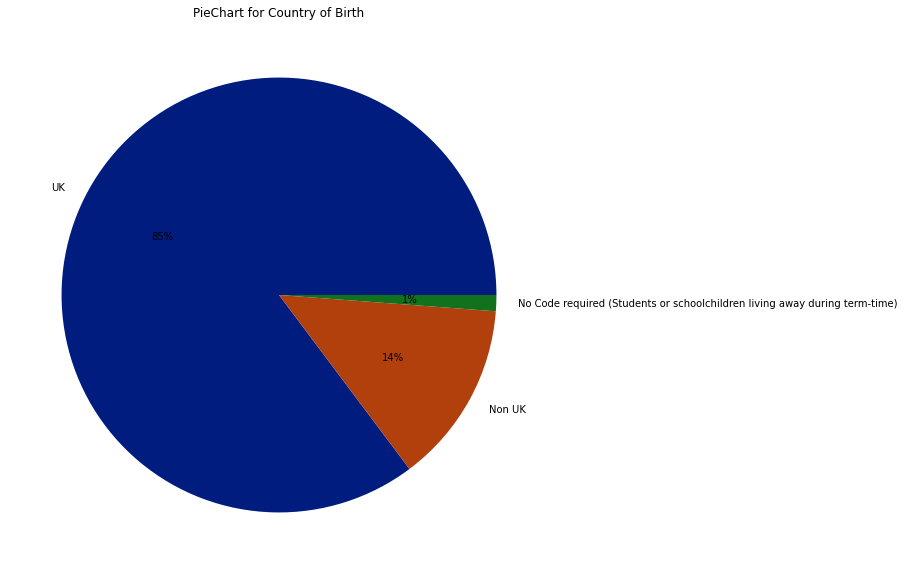

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:03<00:02,  3.47it/s]

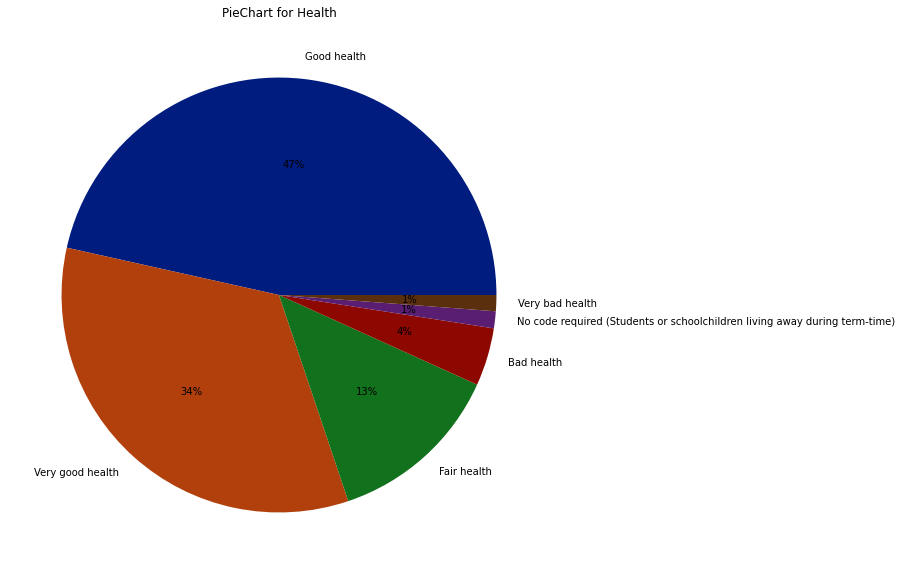

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:03<00:02,  3.41it/s]

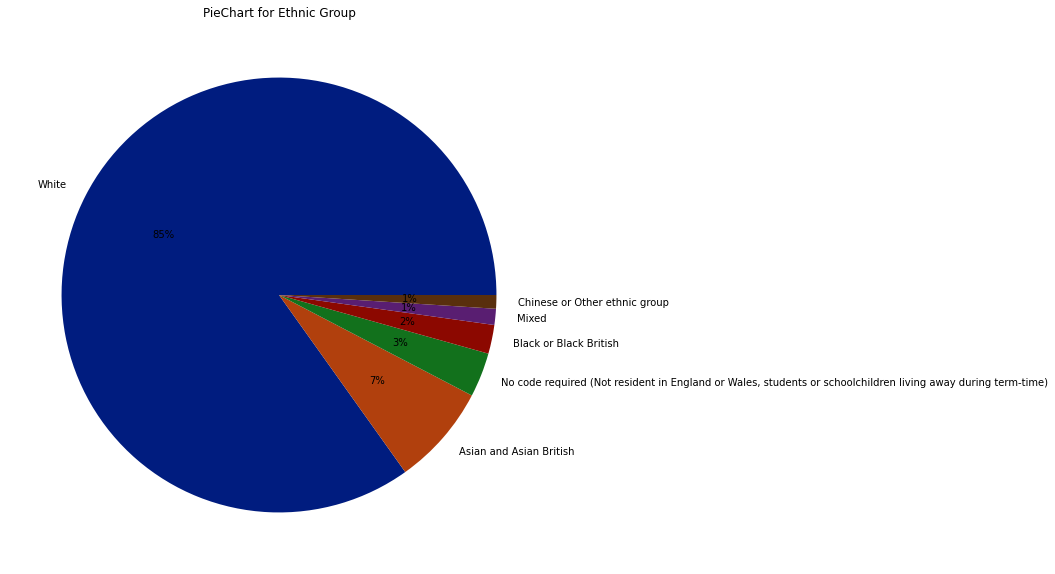

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:03<00:01,  3.24it/s]

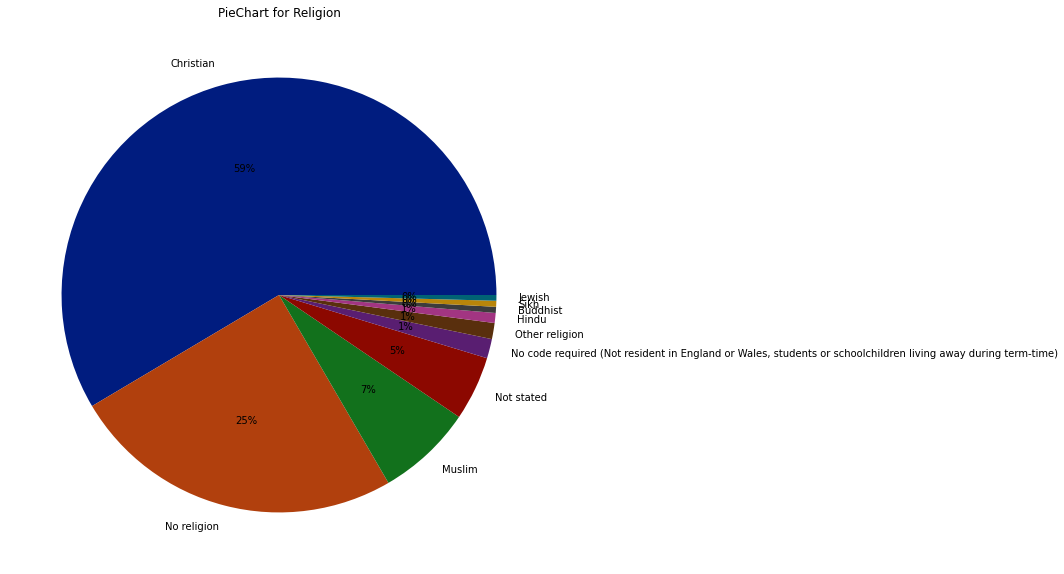

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:04<00:01,  2.99it/s]

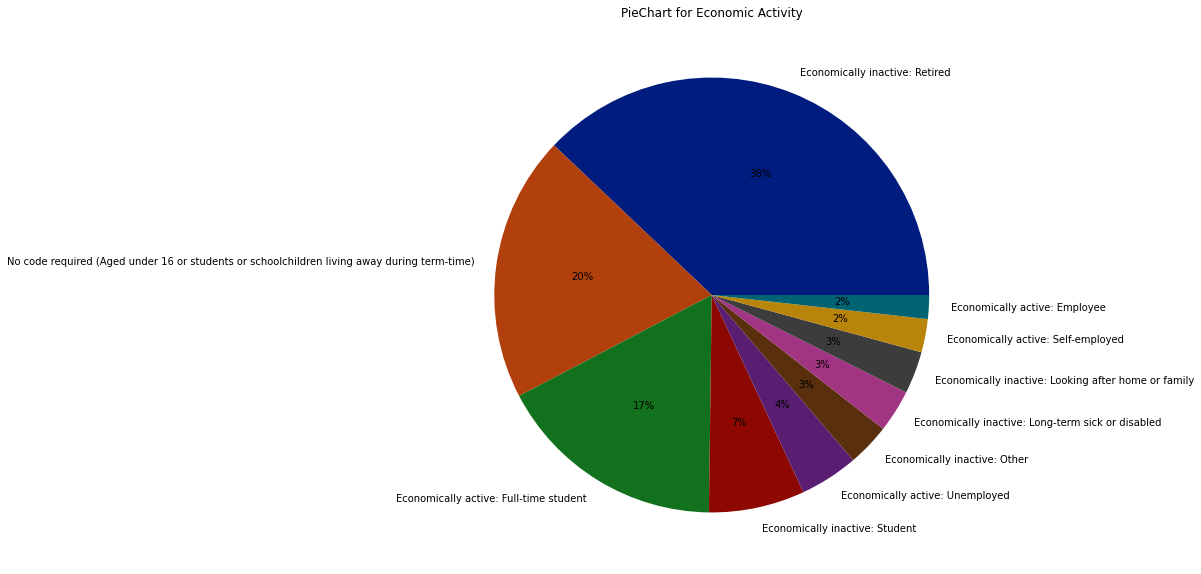

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:04<00:01,  2.60it/s]

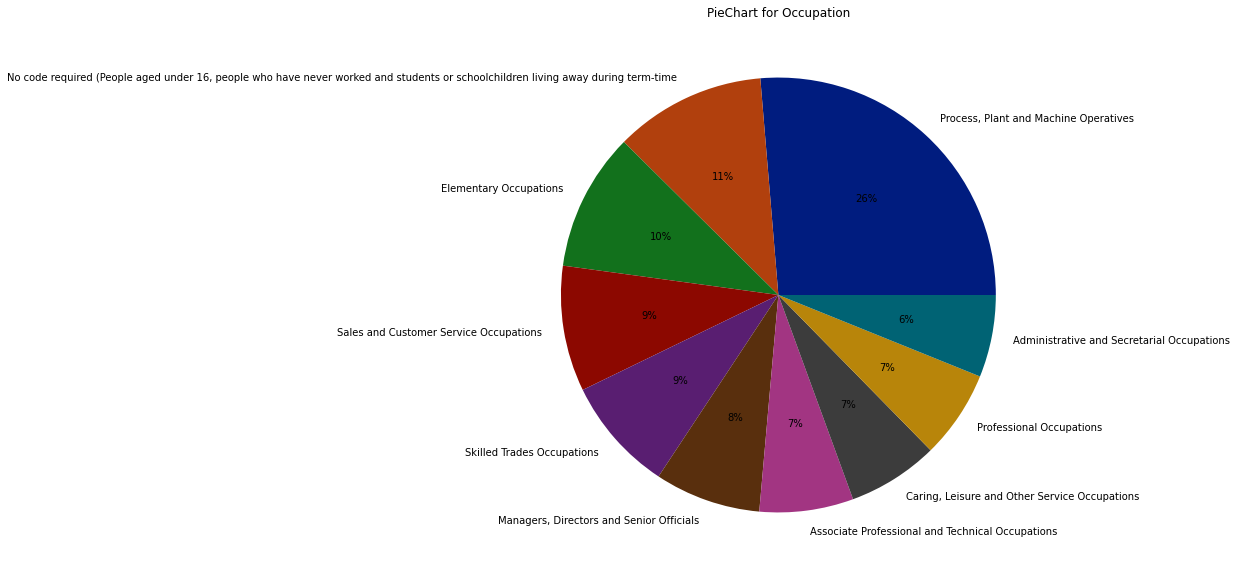

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:05<00:01,  2.42it/s]

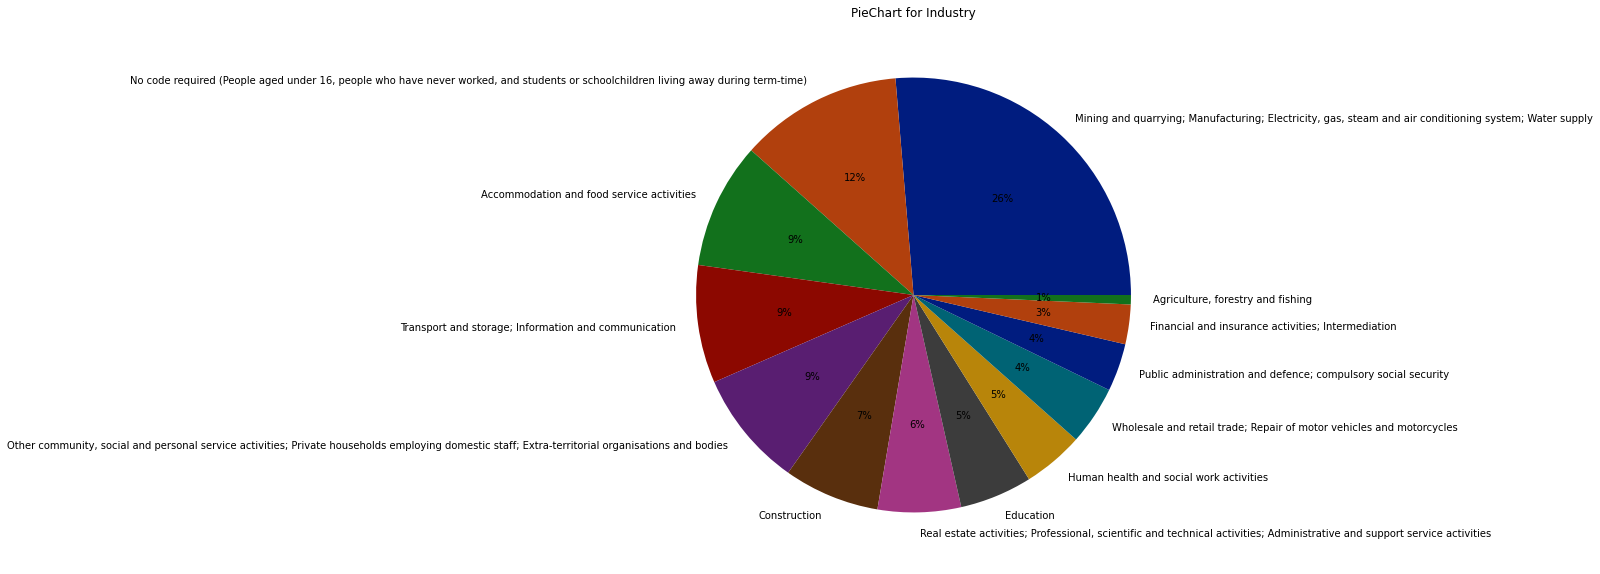

 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:05<00:01,  2.00it/s]

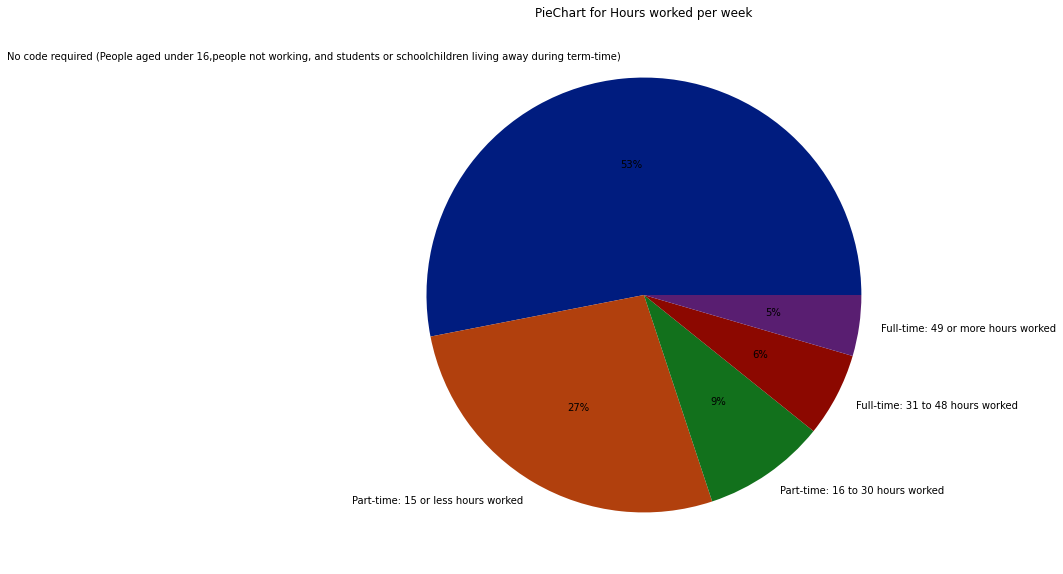

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:06<00:00,  2.13it/s]

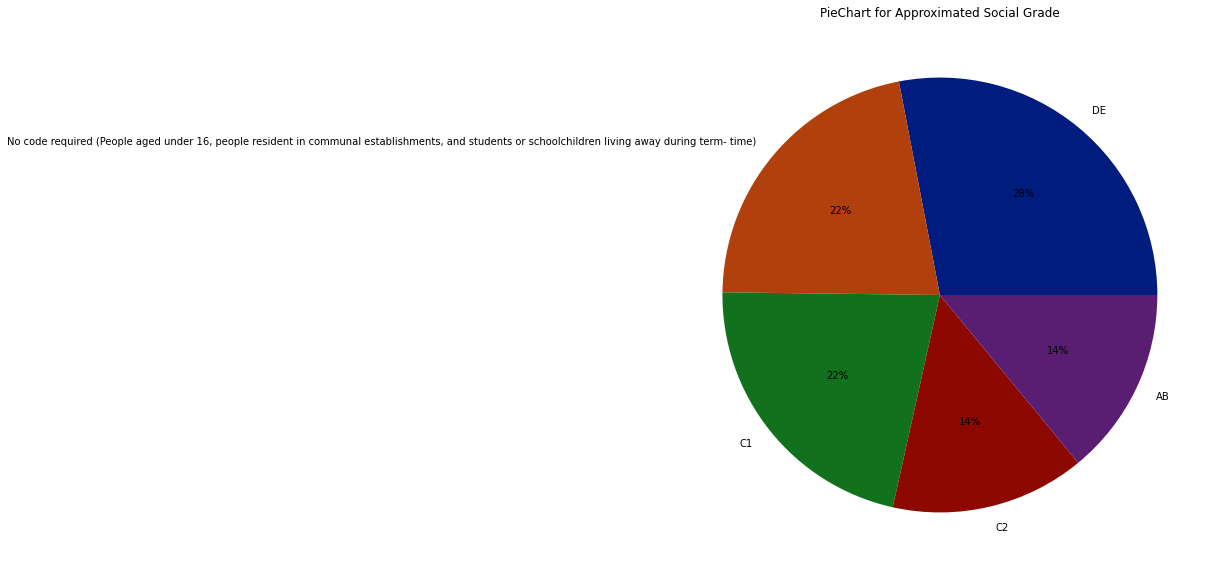

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:06<00:00,  2.57it/s]


In [35]:
for col in tqdm(categ_cols):
    plt.figure(figsize=(10,10))
    palette_color = sns.color_palette('dark')
    plt.pie(x=df1[col].value_counts(), data=df1, labels=list(df1[col].unique()), colors=palette_color, autopct='%.0f%%')
    plt.title(f"PieChart for {col}")
    plt.show()

In [36]:
profile = ProfileReport(df1, title="Census Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
profile.to_file(output_file="Census Profile Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
#categ_cols = list(df1.columns)
categ_cols = np.delete(categ_cols, -2)
categ_cols= list(categ_cols)
categ_cols

['Region',
 'Residence Type',
 'Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Approximated Social Grade']

In [39]:
dfn = df.copy()

In [40]:
df.fillna(0, inplace=True)

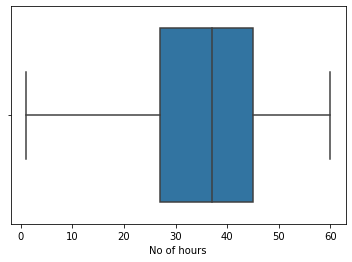

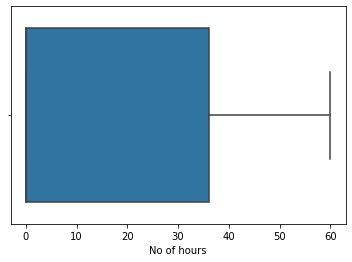

In [41]:
#fig, axes = plt.subplot(1, 2, 1)
sns.boxplot(df1['No of hours'])#,  ax= axes[0, 0, 0])
plt.show()
sns.boxplot(df['No of hours'])#, ax= axes[0, 1, 0])
plt.show()

In [42]:
df[categ_cols] = df[categ_cols].astype('category')

In [43]:
X = df.drop(['No of hours', 'Hours worked per week','Person ID'], axis=1)
y = df['Hours worked per week']

In [44]:
categorical_features_indices =np.where(X.dtypes == 'category')[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

# Catboost
cat = CatBoostClassifier(verbose=False, iterations=100) 
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_pool = Pool(X_valid, y_valid, cat_features=categorical_features_indices)
cat.fit(train_pool, eval_set= test_pool)
cat_pred = cat.predict(X_valid)
f1_score1 = f1_score(y_valid,cat_pred, average ='weighted')
accuracy_score1 = accuracy_score(y_valid,cat_pred)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score1)
print('--------'*20)


CatBoost accuracy_score on validation set is :  0.8271404500298382
CatBoost F1 score on validation set is :  0.8027475214923452
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [46]:
cm = confusion_matrix(y_valid, cat_pred)
cm

array([[60062,   241,    25,    30,     1],
       [   21,  1600,  1414,  2035,    35],
       [   12,   606,  3715,  6089,    78],
       [    6,   299,  1919, 28247,   429],
       [    1,    66,   183,  6207,   627]], dtype=int64)

In [47]:
print(classification_report(y_valid,cat_pred))

              precision    recall  f1-score   support

          -9       1.00      1.00      1.00     60359
           1       0.57      0.31      0.40      5105
           2       0.51      0.35      0.42     10500
           3       0.66      0.91      0.77     30900
           4       0.54      0.09      0.15      7084

    accuracy                           0.83    113948
   macro avg       0.66      0.53      0.55    113948
weighted avg       0.82      0.83      0.80    113948



<AxesSubplot:>

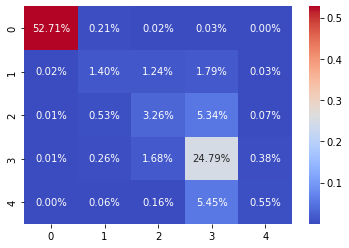

In [48]:
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

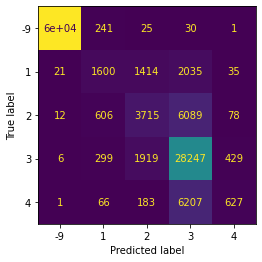

In [49]:
plot_confusion_matrix(cat, X_valid , y_valid  , colorbar= False )

In [50]:
# LGBM
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_valid)
f1_score10 = f1_score(y_valid,lgb_pred, average ='weighted')
accuracy_score10 = accuracy_score(y_valid,lgb_pred)
print("LGBM accuracy_score on validation set is : ",accuracy_score(y_valid,lgb_pred))
print("LGBM F1 score on validation set is : ",f1_score10)
print('--------'*20)

LGBM accuracy_score on validation set is :  0.8284743918278513
LGBM F1 score on validation set is :  0.8065207905325874
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [51]:
cm = confusion_matrix(y_valid, lgb_pred)
cm

array([[60072,   239,    26,    22,     0],
       [   28,  1693,  1468,  1874,    42],
       [   18,   685,  4026,  5689,    82],
       [   14,   342,  2113, 27899,   532],
       [    3,    57,   192,  6119,   713]], dtype=int64)

In [52]:
print(classification_report(y_valid,lgb_pred))

              precision    recall  f1-score   support

          -9       1.00      1.00      1.00     60359
           1       0.56      0.33      0.42      5105
           2       0.51      0.38      0.44     10500
           3       0.67      0.90      0.77     30900
           4       0.52      0.10      0.17      7084

    accuracy                           0.83    113948
   macro avg       0.65      0.54      0.56    113948
weighted avg       0.82      0.83      0.81    113948



<AxesSubplot:>

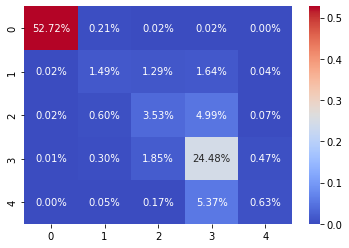

In [53]:
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

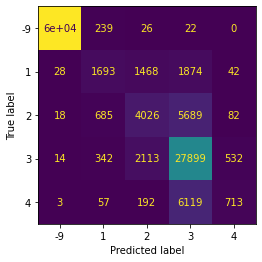

In [54]:
plot_confusion_matrix(lgb, X_valid , y_valid  , colorbar= False )

In [55]:
X1 = df.drop(['No of hours', 'Hours worked per week','Person ID'], axis=1)
y1 = df['Hours worked per week']
y1= y1.replace(-9,0)
#X1[categ_cols] = X1[categ_cols].astype(int)


In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size=0.2, random_state=42) 


In [57]:
# XGBoost
#import xgboost as xgb
xg = XGBClassifier(n_estimators=100, enable_categorical=True, tree_method='hist')
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)
f1_score11 = f1_score(y_valid,xg_pred, average ='weighted')
accuracy_score11 = accuracy_score(y_valid,xg_pred)
print("XGBoost accuracy_score on validation set is : ",accuracy_score(y_valid,xg_pred))
print("XGBoost F1 score on validation set is : ",f1_score11)
print('--------'*20)

XGBoost accuracy_score on validation set is :  0.828009267385123
XGBoost F1 score on validation set is :  0.8074779433488457
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [58]:
cm = confusion_matrix(y_valid, xg_pred)
cm

array([[60074,   222,    35,    27,     1],
       [   31,  1720,  1499,  1817,    38],
       [   20,   701,  4123,  5553,   103],
       [   12,   363,  2253, 27649,   623],
       [    3,    72,   206,  6019,   784]], dtype=int64)

In [59]:
print(classification_report(y_valid,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60359
           1       0.56      0.34      0.42      5105
           2       0.51      0.39      0.44     10500
           3       0.67      0.89      0.77     30900
           4       0.51      0.11      0.18      7084

    accuracy                           0.83    113948
   macro avg       0.65      0.55      0.56    113948
weighted avg       0.82      0.83      0.81    113948



<AxesSubplot:>

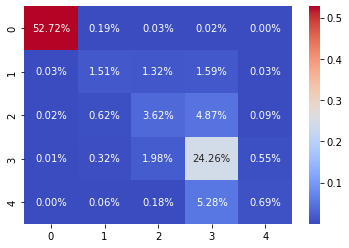

In [60]:
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

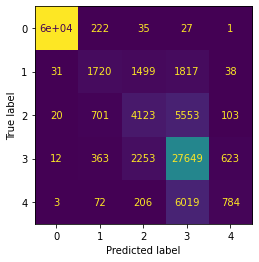

In [61]:
plot_confusion_matrix(xg, X_valid , y_valid  , colorbar= False )

In [62]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score10, f1_score11],
    "Accuracy": [accuracy_score1, accuracy_score10, accuracy_score11]
    })

model_performance = model_performance.sort_values(["Accuracy"], ascending=False)
    
display(model_performance)

Model  F1_Score  Accuracy
1      LGBM  0.806521  0.828474
2   XGBoost  0.807478  0.828009
0  CatBoost  0.802748  0.827140

In [63]:
X = df.drop(['No of hours', 'Hours worked per week','Person ID'], axis=1)
y = df['No of hours']

In [64]:
X1 = df.drop(['No of hours', 'Hours worked per week','Person ID'], axis=1)
y1 = df['No of hours']


In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

# Catboost
cat = CatBoostRegressor(verbose=False, iterations=100) 
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_pool = Pool(X_valid, y_valid, cat_features=categorical_features_indices)
cat.fit(train_pool, eval_set= test_pool)
cat_pred = cat.predict(X_valid)
cat_MAE = mean_absolute_error(y_valid,cat_pred)#, squared=False)
cat_r2= r2_score(y_valid,cat_pred, multioutput='variance_weighted')
print("CatBoost MAE score on validation set is : ",cat_MAE)
print("CatBoost R2 score on validation set is : ",cat_r2)
print('--------'*20)


CatBoost MAE score on validation set is :  4.278827260447868
CatBoost R2 score on validation set is :  0.8468622191199275
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [66]:
# LGBM
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

lgb = LGBMRegressor(num_iterations=100)
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_valid)
lgb_MAE = mean_absolute_error(y_valid,lgb_pred)#, squared=False)
lgb_r2= r2_score(y_valid,lgb_pred, multioutput='variance_weighted')
print("LGBM MAE score on validation set is : ",lgb_MAE)
print("LGBM R2 score on validation set is : ",lgb_r2)
print('--------'*20)

LGBM MAE score on validation set is :  4.181187477314729
LGBM R2 score on validation set is :  0.8494564818552238
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size=0.2, random_state=42) 
# XGBoost
xg = XGBRegressor(n_estimators=100, enable_categorical=True, tree_method='hist')
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)
xg_MAE = mean_absolute_error(y_valid,xg_pred)#, squared=False)
xg_r2= r2_score(y_valid,xg_pred, multioutput='variance_weighted')
print("XGBoost MAE score on validation set is : ",xg_MAE)
print("XGBoost R2 score on validation set is : ",xg_r2)
print('--------'*20)

XGBoost MAE score on validation set is :  4.255273738646821
XGBoost R2 score on validation set is :  0.8497123246399054
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [68]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost","LGBM", "XGBoost"],
    "MAE": [cat_MAE, lgb_MAE, xg_MAE],
    'R2': [cat_r2, lgb_r2, xg_r2]
    })

model_performance['Average Score']= (model_performance['MAE']+model_performance['R2'])/2

model_performance = model_performance.sort_values(['Average Score'])
    
display(model_performance)

Model       MAE        R2  Average Score
1      LGBM  4.181187  0.849456       2.515322
2   XGBoost  4.255274  0.849712       2.552493
0  CatBoost  4.278827  0.846862       2.562845

In [69]:
df.head()

Person ID Region Residence Type Family Composition Population Base Sex Age  \
0    7394816      0              1                  2               1   2   6   
1    7394832      0              1                  3               1   2   1   
2    7394719      0              1                  2               1   1   7   
3    7394840      0              1                  1               1   2   6   
4    7394711      0              1                  2               1   1   1   

  Marital Status Student Country of Birth Health Ethnic Group Religion  \
0              2       2                1      2            1        2   
1              1       2                1      2            1        1   
2              2       2                1      1            1        2   
3              4       2                1      3            1        2   
4              1       1                1      1            1        1   

  Economic Activity Occupation Industry  Hours worked per week  No of hours  \
0                 5          8        2                     -9          0.0   
1                -9         -9       -9                     -9          0.0   
2                 5          8        2                     -9          0.0   
3                 5          9        5                     -9          0.0   
4                -9         -9       -9                     -9          0.0   

  Approximated Social Grade  
0                         4  
1                        -9  
2                         2  
3                         4  
4                        -9

In [70]:
df2 = df1.drop(['Person ID', 'No of hours'], axis =1)

In [71]:
encoder = OneHotEncoder(sparse=False)
df_OH= df2.copy()
#df_OH = df_OH.drop('Person ID', axis=1)
d= list(df_OH.columns)
encoder.fit(df_OH)
b= encoder.categories_
df_OH=encoder.transform(df_OH)#.toarray()

df_OH= pd.DataFrame(df_OH)
df_OH.columns = encoder.get_feature_names_out(d)
df_OH = df_OH.astype(int)
df_OH.sample(10)

Region_East Midlands  Region_East of England  Region_London  \
231380                     0                       0              0   
307712                     0                       1              0   
351885                     0                       1              0   
217298                     0                       0              0   
529516                     0                       0              0   
392917                     0                       0              0   
363783                     0                       0              0   
88386                      0                       1              0   
278297                     0                       0              0   
60771                      0                       0              0   

        Region_North East  Region_North West  Region_South East  \
231380                  0                  0                  0   
307712                  0                  0                  0   
351885                  0                  0                  0   
217298                  0                  0                  0   
529516                  0                  0                  0   
392917                  0                  0                  0   
363783                  0                  0                  0   
88386                   0                  0                  0   
278297                  0                  0                  0   
60771                   0                  0                  0   

        Region_South West  Region_Wales  Region_West Midlands  \
231380                  0             0                     0   
307712                  0             0                     0   
351885                  0             0                     0   
217298                  0             0                     1   
529516                  0             1                     0   
392917                  1             0                     0   
363783                  0             0                     0   
88386                   0             0                     0   
278297                  0             1                     0   
60771                   1             0                     0   

        Region_Yorkshire and the Humber  ...  \
231380                                1  ...   
307712                                0  ...   
351885                                0  ...   
217298                                0  ...   
529516                                0  ...   
392917                                0  ...   
363783                                1  ...   
88386                                 0  ...   
278297                                0  ...   
60771                                 0  ...   

        Hours worked per week_Full-time: 31 to 48 hours worked  \
231380                                                  0        
307712                                                  0        
351885                                                  0        
217298                                                  0        
529516                                                  1        
392917                                                  1        
363783                                                  0        
88386                                                   0        
278297                                                  0        
60771                                                   0        

        Hours worked per week_Full-time: 49 or more hours worked  \
231380                                                  0          
307712                                                  0          
351885                                                  0          
217298                                                  0          
529516                                                  0          
392917                                                  0          
363783                                  

In [72]:
from itertools import combinations

def apriori(data, min_length=2, max_length=5, min_support=0.0045, min_confidence=0.2, min_lift=3):
    df_supports = []
    dataset_size = len(data)
    for combination_number in tqdm(range(min_length, max_length+1)):
        for cols in combinations(data.columns, combination_number):
            supports = data[list(cols)].all(axis=1).sum() * 1.0 / dataset_size
            confidenceAB = data[list(cols)].all(axis=1).sum() * 1.0 / len(data[data[cols[0]]==1])
            confidenceBA = data[list(cols)].all(axis=1).sum() * 1.0 / len(data[data[cols[-1]]==1])
            liftAB = confidenceAB * dataset_size / len(data[data[cols[-1]]==1])
            liftBA = confidenceAB * dataset_size / len(data[data[cols[0]]==1])
            df_supports.append([",".join(cols), supports, confidenceAB, confidenceBA, liftAB, liftBA])
    df_supports = pd.DataFrame(df_supports, columns=['Pattern', 'Support', 'ConfidenceAB', 'ConfidenceBA', 'liftAB', 'liftBA'])
    df_supports = df_supports.loc[(df_supports['Support'] != 0.000000) & (df_supports['ConfidenceAB'] != 0.000000) & (df_supports['ConfidenceBA'] != 0.000000) & (df_supports['liftAB'] != 0.000000) & (df_supports['liftBA'] != 0.000000) &(df_supports['Support'] != 1.000000) & (df_supports['ConfidenceAB'] != 1.000000) & (df_supports['ConfidenceBA'] != 1.000000) & (df_supports['liftAB'] != 1.000000) & (df_supports['liftBA'] != 1.000000)]
    df_supports = df_supports.loc[(df_supports['Support'] >= min_support) & (df_supports['ConfidenceAB'] >= min_confidence) & (df_supports['ConfidenceBA'] >= min_confidence) & (df_supports['liftAB'] >= min_lift) & (df_supports['liftBA'] >= min_lift)]
    df_supports.sort_values(by='Support', ascending=False, inplace =True)
    df_supports.reset_index(inplace =True, drop =True)
    return df_supports
association_rules = apriori(df_OH, min_length=2, max_length=2, min_support=0.0045, min_confidence=0.2, min_lift=3)
association_rules

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [38:26<00:00, 2306.20s/it]


Pattern   Support  ConfidenceAB  \
0   Student_Yes,Industry_No code required (People ...  0.186331      0.838964   
1   Student_Yes,Occupation_No code required (Peopl...  0.186331      0.838964   
2   Student_Yes,Approximated Social Grade_No code ...  0.163513      0.736227   
3   Student_Yes,Economic Activity_No code required...  0.155478      0.700048   
4                             Age_0 to 15,Student_Yes  0.145322      0.775011   
5   Occupation_Professional Occupations,Approximat...  0.084431      0.750324   
6   Occupation_Administrative and Secretarial Occu...  0.078846      0.843542   
7   Occupation_Elementary Occupations,Approximated...  0.074478      0.725561   
8   Age_75 and over,Economic Activity_Economically...  0.070843      0.923531   
9   Age_65 to 74,Economic Activity_Economically in...  0.068921      0.805031   
10  Occupation_Skilled Trades Occupations,Approxim...  0.065275      0.766078   
11  Occupation_Sales and Customer Service Occupati...  0.049826      0.736910   
12  Marital Status_Widowed or surviving partner fr...  0.044624      0.797041   
13  Age_75 and over,Marital Status_Widowed or surv...  0.034316      0.447350   
14  Occupation_Managers, Directors and Senior Offi...  0.033682      0.482306   
15                 Age_75 and over,Health_Fair health  0.032380      0.422112   
16  Ethnic Group_Asian and Asian British,Religion_...  0.032259      0.430311   
17    Industry_Education,Approximated Social Grade_AB  0.031706      0.445365   
18  Occupation_Caring, Leisure and Other Service O...  0.030093      0.459688   
19  Occupation_Skilled Trades Occupations,Industry...  0.027174      0.318914   
20  Occupation_Process, Plant and Machine Operativ...  0.025687      0.420341   
21  Economic Activity_Economically active: Self-em...  0.020278      0.284333   
22  Economic Activity_Economically active: Self-em...  0.017452      0.244709   
23  Occupation_Managers, Directors and Senior Offi...  0.015154      0.217000   
24  Occupation_Process, Plant and Machine Operativ...  0.014510      0.237441   
25  Health_Bad health,Economic Activity_Economical...  0.012021      0.278891   
26  Economic Activity_Economically active: Full-ti...  0.011347      0.457958   

    ConfidenceBA     liftAB     liftBA  
0       0.707809   3.186949   3.777483  
1       0.707809   3.186949   3.777483  
2       0.750667   3.379920   3.314905  
3       0.786571   3.541578   3.152007  
4       0.654322   3.489532   4.133171  
5       0.584354   5.193020   6.667957  
6       0.281392   3.010485   9.024670  
7       0.342923   3.340752   7.068401  
8       0.414054   5.397749  12.039460  
9       0.402821   4.705154   9.403169  
10      0.465247   5.460181   8.990751  
11      0.412149   6.095522  10.898615  
12      0.260812   4.658452  14.236187  
13      0.612922   7.990262   5.831809  
14      0.233115   3.338061   6.906332  
15      0.247691   3.228978   5.502799  
16      0.674706   9.000191   5.740095  
17      0.219436   3.082388   6.255971  
18      0.347452   5.307587   7.022090  
19      0.504185   5.917155   3.742802  
20      0.273894   4.481966   6.878389  
21      0.237980   3.336951   3.986898  
22      0.279510   3.919272   3.431293  
23      0.242712   3.475491   3.107310  
24      0.234591   3.838817   3.885456  
25      0.380690   8.831929   6.470203  
26      0.250815  10.122489  18.482487

In [73]:
from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(df_OH, min_support = 0.05, max_len=2, low_memory=True,use_colnames = True)

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]).reset_index(drop=True)
rules.sample(20)

antecedents  \
527                     (Approximated Social Grade_C2)   
241                               (Health_Good health)   
880  (Family Composition_Married/same-sex civil par...   
511  (Residence Type_Not resident in a communal est...   
732  (Economic Activity_Economically active: Employee)   
896  (Residence Type_Not resident in a communal est...   
811                                       (Sex_Female)   
10   (Economic Activity_Economically inactive: Reti...   
774                   (Population Base_Usual resident)   
31                      (Approximated Social Grade_C1)   
355                     (Approximated Social Grade_DE)   
91                                      (Age_45 to 54)   
256                              (Religion_Not stated)   
547  (Marital Status_Single (never married or never...   
950                   (Population Base_Usual resident)   
798                              (Country of Birth_UK)   
514                     (Approximated Social Grade_C2)   
105  (Hours worked per week_Full-time: 31 to 48 hou...   
392              (Occupation_Professional Occupations)   
943                   (Population Base_Usual resident)   

                                           consequents  antecedent support  \
527  (Hours worked per week_Full-time: 31 to 48 hou...            0.140303   
241                                       (Student_No)            0.336545   
880                                (Region_South West)            0.528243   
511                          (Health_Very good health)            0.981300   
732                                (Region_South East)            0.379162   
896  (Occupation_Administrative and Secretarial Occ...            0.981300   
811  (Industry_Wholesale and retail trade; Repair o...            0.507551   
10   (Hours worked per week_No code required (Peopl...            0.171096   
774                                     (Age_35 to 44)            0.984728   
31                    (Population Base_Usual resident)            0.280201   
355                               (Religion_Christian)            0.217185   
91                                        (Student_No)            0.135830   
256                               (Ethnic Group_White)            0.071283   
547                                      (Age_0 to 15)            0.475654   
950                               (Industry_Education)            0.984728   
798                                (Region_North West)            0.852398   
514            (Occupation_Skilled Trades Occupations)            0.140303   
105                                       (Student_No)            0.270188   
392  (Family Composition_Married/same-sex civil par...            0.112527   
943  (Marital Status_Divorced or formerly in a same...            0.984728   

     consequent support   support  confidence      lift  leverage  conviction  
527            0.270188  0.059185    0.421837  1.561273  0.021277    1.262295  
241            0.777904  0.292130    0.868026  1.115853  0.030330    1.682883  
880            0.094383  0.051757    0.097979  1.038101  0.001900    1.003987  
511            0.465074  0.458534    0.467272  1.004726  0.002157    1.004126  
732            0.154604  0.059927    0.158052  1.022302  0.001307    1.004095  
896            0.093471  0.092339    0.094098  1.006714  0.000616    1.000693  
811            0.120894  0.064570    0.127218  1.052316  0.003210    1.007247  
10             0.530630  0.171096    1.000000  1.884553  0.080307         inf  
774            0.138030  0.137747    0.139883  1.013430  0.001825    1.002155  
31             0.984728  0.280201    1.000000  1.015509  0.004279         inf  
355            0.585321  0.137498    0.633091  1.081612  0.010375    1.130194  
91             0.777904  0.134853    0.992803  1.276253  0.029190   30.857394  
256            0.848592  0.061360    0.860783  1.014366  0.000869    1.087570  
547            0.187510  0.187491    0.394175  2.102153  0.098301

In [74]:
df.columns

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [75]:
df['Hours worked per week']= df['Hours worked per week'].astype('category')

In [76]:
X = df.drop(['Person ID', 'No of hours'], axis=1)
#y = df['Hours worked per week']

In [77]:
from kmodes.kmodes import KModes

kmodes = KModes(n_clusters=5, random_state=0).fit(X)
y_km = kmodes.predict(X)
y_km

array([2, 0, 2, ..., 0, 1, 1], dtype=uint16)

In [78]:
kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++').fit(df_OH)

In [79]:
y_km = kmeans.predict(df_OH)
y_km

array([3, 4, 3, ..., 2, 2, 0])

In [80]:
#birch = Birch(n_clusters=5, threshold=1.5, branching_factor=200).fit(X)

In [81]:
newa = df_OH.sample(100000)

In [82]:
from sklearn.cluster import BisectingKMeans, DBSCAN, AgglomerativeClustering, OPTICS
Bkmeans = DBSCAN(eps=3, min_samples=2).fit_predict(newa)

In [83]:
Bkmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)